In [1]:
# import libraties

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
# load csv file to a dataframe

df = pd.read_csv('Data/SET50_download_r2/ADVANC.BK.csv', index_col = 0)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,44.599998,46.000000,43.000000,43.400002,11.032709,1039000
2000-01-05,38.200001,41.000000,38.000000,40.599998,10.320922,2624000
2000-01-06,41.000000,41.200001,38.400002,38.599998,9.812499,1341000
2000-01-07,38.599998,39.799999,38.000000,38.599998,9.812499,1164000
2000-01-10,39.799999,40.799999,39.599998,40.000000,10.168396,761000


In [3]:
df.index

Index(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-10',
       '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14', '2000-01-17',
       ...
       '2024-02-12', '2024-02-13', '2024-02-14', '2024-02-15', '2024-02-16',
       '2024-02-19', '2024-02-20', '2024-02-21', '2024-02-22', '2024-02-23'],
      dtype='object', name='Date', length=5994)

In [4]:
# set index from object to datetime

df.set_index(pd.to_datetime(df.index), inplace = True)
df.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2024-02-12', '2024-02-13', '2024-02-14', '2024-02-15',
               '2024-02-16', '2024-02-19', '2024-02-20', '2024-02-21',
               '2024-02-22', '2024-02-23'],
              dtype='datetime64[ns]', name='Date', length=5994, freq=None)

In [5]:
# get data from 2020

df = df['2020':]
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,214.0,219.0,212.0,218.0,183.957199,5921300
2020-01-03,216.0,217.0,215.0,216.0,182.269547,4426800
2020-01-06,216.0,220.0,216.0,217.0,183.113388,5147100
2020-01-07,218.0,224.0,217.0,223.0,188.176453,7220900
2020-01-08,221.0,223.0,219.0,220.0,185.644913,6768300


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-19,209.0,210.0,208.0,209.0,209.0,4822100
2024-02-20,210.0,210.0,207.0,207.0,207.0,4352500
2024-02-21,208.0,209.0,203.0,205.0,205.0,12475500
2024-02-22,205.0,211.0,204.0,209.0,209.0,9222400
2024-02-23,209.0,209.0,206.0,206.0,206.0,4196600


In [7]:
df.shape

(1006, 6)

### Simple Return

$$
\frac{P_t}{P_{t-1}} - 1
$$

In [8]:
# add new calculated column for simple return

df['simple_return'] = (df['Close']/df['Close'].shift(1)) - 1
df.head()

,Open,High,Low,Close,Adj Close,Volume,simple_return
Date,,,,,,,
2020-01-02,214.0,219.0,212.0,218.0,183.957199,5921300,NaN
2020-01-03,216.0,217.0,215.0,216.0,182.269547,4426800,-0.009174
2020-01-06,216.0,220.0,216.0,217.0,183.113388,5147100,0.004630
2020-01-07,218.0,224.0,217.0,223.0,188.176453,7220900,0.027650
2020-01-08,221.0,223.0,219.0,220.0,185.644913,6768300,-0.013453


In [9]:
216.0/218.0 - 1

-0.00917431192660545

In [10]:
# apply a build-in function to get simple return

df['Close'].pct_change().head() 

Date
2020-01-02         NaN
2020-01-03   -0.009174
2020-01-06    0.004630
2020-01-07    0.027650
2020-01-08   -0.013453
Name: Close, dtype: float64

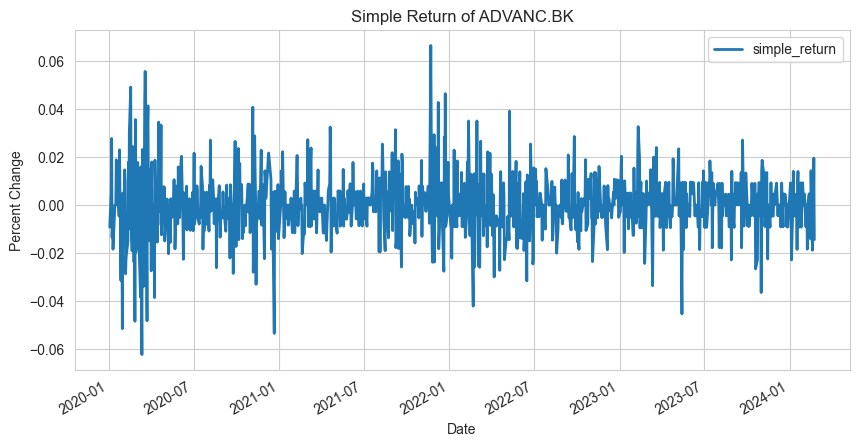

In [11]:
# plot

plt.rcParams['figure.figsize'] = (10.0, 5.0)

df[['simple_return']].plot(linewidth = 2)
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.title('Simple Return of ADVANC.BK')
plt.show()

In [12]:
df['simple_return'].mean()

2.78089765051957e-05

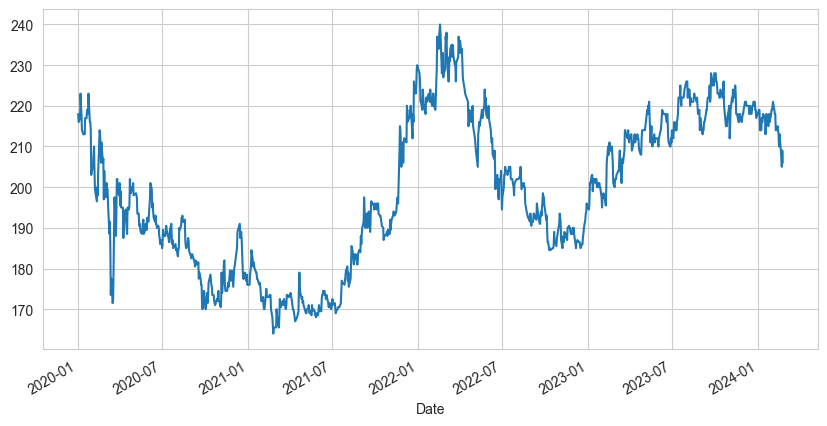

In [13]:
df['Close'].plot(); # plot

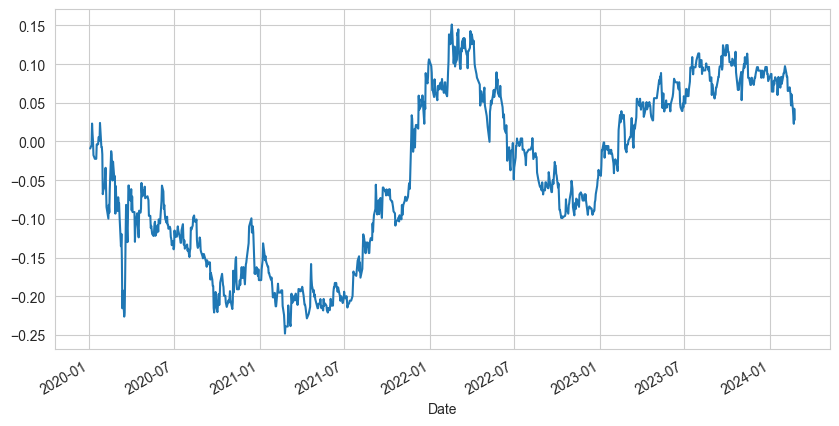

In [14]:
df['simple_return'].cumsum().plot(); # plot cumsum

### Log Return

$$
ln(\frac{P_t}{P_{t-1}})
$$

In [15]:
# add a new calculated column for log return


df['log_return'] = np.log(df['Close']/df['Close'].shift(1))
df.head()

,Open,High,Low,Close,Adj Close,Volume,simple_return,log_return
Date,,,,,,,,
2020-01-02,214.0,219.0,212.0,218.0,183.957199,5921300,NaN,NaN
2020-01-03,216.0,217.0,215.0,216.0,182.269547,4426800,-0.009174,-0.009217
2020-01-06,216.0,220.0,216.0,217.0,183.113388,5147100,0.004630,0.004619
2020-01-07,218.0,224.0,217.0,223.0,188.176453,7220900,0.027650,0.027274
2020-01-08,221.0,223.0,219.0,220.0,185.644913,6768300,-0.013453,-0.013544


In [16]:
np.log(216.0/218.0)

-0.009216655104923952

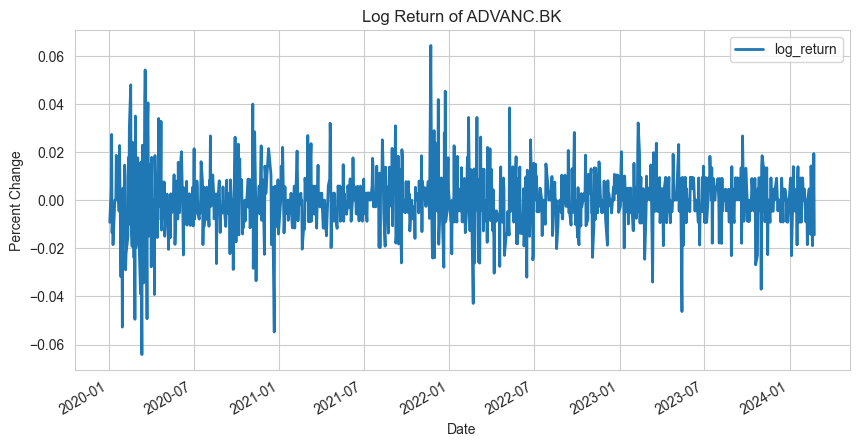

In [17]:
# plot

plt.rcParams['figure.figsize'] = (10.0, 5.0)

df[['log_return']].plot(linewidth = 2)
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.title('Log Return of ADVANC.BK')
plt.show()

In [18]:
df['log_return'].mean()

-5.6337207959711395e-05

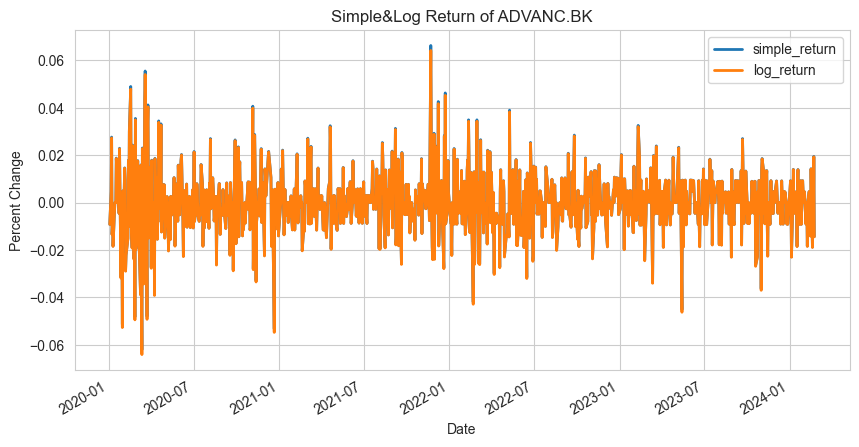

In [19]:
# plot

plt.rcParams['figure.figsize'] = (10.0, 5.0)

df[['simple_return', 'log_return']].plot(linewidth = 2)
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.title('Simple&Log Return of ADVANC.BK')
plt.show()

In [20]:
# Annual Log Return

annual_log_return = df['log_return'].mean() * 252
annual_log_return

-0.01419697640584727

In [21]:
print(f'Annual Return: {(annual_log_return * 100):.4}%')

Annual Return: -1.42%


### Randoms, Histogram, and Normal Distribution

In [22]:
np.random.seed(20)

mu = 0
sigma = 0.05

In [23]:
stock_1 = np.random.normal(mu, sigma, 10000) # random numbers
stock_1

array([ 0.04419466,  0.00979325,  0.01787683, ..., -0.04157543,
       -0.06966699, -0.05317517])

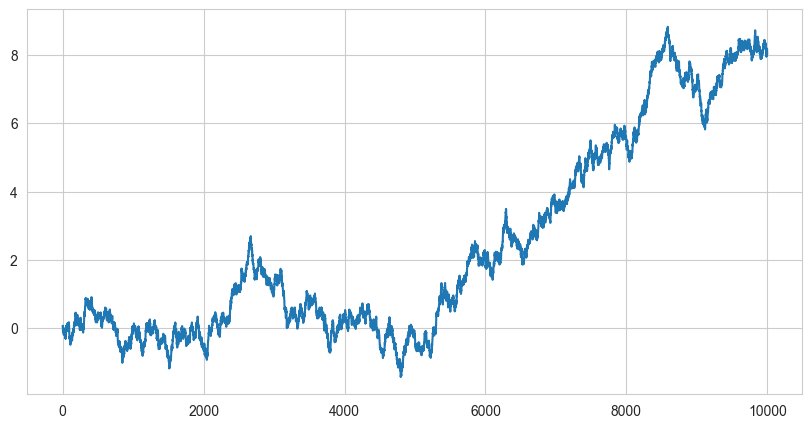

In [24]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)

plt.plot(stock_1.cumsum())

<AxesSubplot: ylabel='Count'>

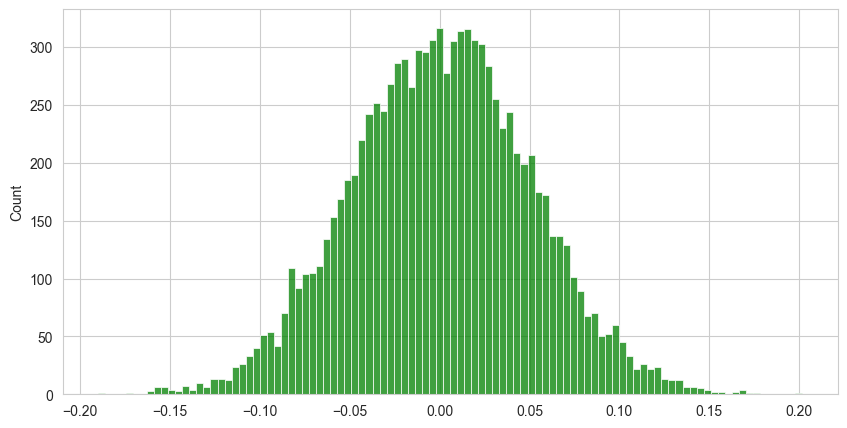

In [25]:
sns.histplot(stock_1, bins = 100, color = 'green')

In [26]:
# load csv data to a dataframe

bdms = pd.read_csv('Data/SET50_download_r2/BDMS.BK.csv', index_col = 0)
bdms.set_index(pd.to_datetime(bdms.index), inplace = True)
bdms = bdms['2013': '2023']
bdms.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,11.50,11.50,11.30,11.30,9.314999,19474000
2013-01-03,11.35,11.45,11.35,11.45,9.438648,25001000
2013-01-04,11.45,11.50,11.35,11.50,9.479865,22793000
2013-01-07,11.55,11.60,11.40,11.40,9.397430,27909000
2013-01-08,11.40,11.55,11.40,11.50,9.479865,15006000


In [27]:
bdms.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,26.25,26.75,26.00,26.25,26.25,65617700
2023-12-25,26.25,26.75,26.25,26.75,26.75,15755500
2023-12-26,26.75,27.75,26.75,27.50,27.50,65852500
2023-12-27,27.50,27.75,27.25,27.75,27.75,39174500
2023-12-28,27.50,28.00,27.25,27.75,27.75,44815400


<AxesSubplot: xlabel='Close', ylabel='Count'>

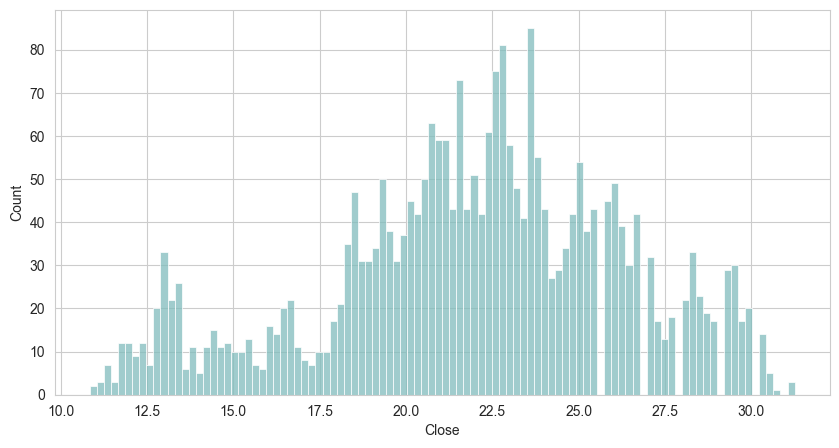

In [28]:
sns.histplot(bdms['Close'], bins = 100, color = '#80BCBD')

In [29]:
bdms_pct = bdms['Close'].pct_change()
bdms_pct

Date
2013-01-02         NaN
2013-01-03    0.013274
2013-01-04    0.004367
2013-01-07   -0.008696
2013-01-08    0.008772
                ...   
2023-12-22    0.009615
2023-12-25    0.019048
2023-12-26    0.028037
2023-12-27    0.009091
2023-12-28    0.000000
Name: Close, Length: 2677, dtype: float64

In [30]:
bdms_pct = bdms_pct.dropna()
bdms_pct

Date
2013-01-03    0.013274
2013-01-04    0.004367
2013-01-07   -0.008696
2013-01-08    0.008772
2013-01-09   -0.004348
                ...   
2023-12-22    0.009615
2023-12-25    0.019048
2023-12-26    0.028037
2023-12-27    0.009091
2023-12-28    0.000000
Name: Close, Length: 2676, dtype: float64

In [31]:
# setting

mu_bdms = bdms_pct.mean()
sigma_bdms = bdms_pct.std()

stock_bdms = np.random.normal(mu_bdms, sigma_bdms, bdms_pct.shape[0])
stock_bdms

array([-0.0040874 , -0.00073886,  0.00311005, ..., -0.00084093,
        0.00351513, -0.02520514])

In [32]:
stock_bdms.shape

(2676,)

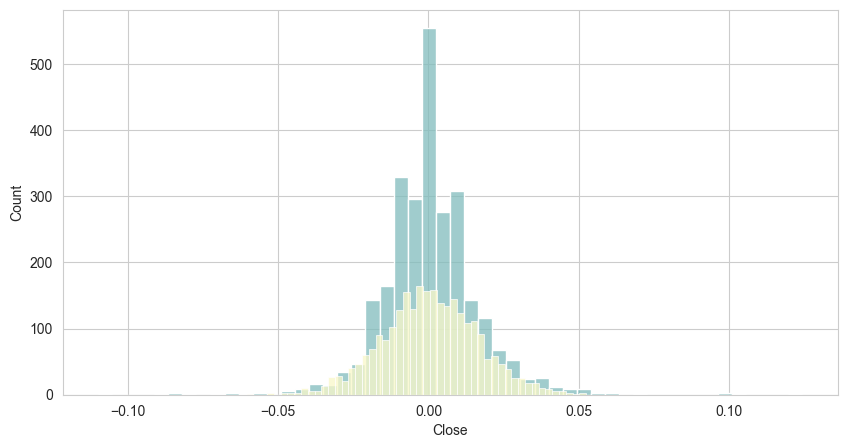

In [33]:
# plots

sns.histplot(bdms_pct, color = '#80BCBD', bins = 50) # pastel grren 
sns.histplot(stock_bdms, bins = 50, color = '#F9F7C9') # pastel yellow
plt.show()

### Mean

In [34]:
numbers = (1, 3, 5, 7, 9, 2, 4)
numbers

(1, 3, 5, 7, 9, 2, 4)

In [35]:
n = len(numbers)
n

7

In [36]:
mean = np.sum(numbers)/n
mean

4.428571428571429

In [37]:
# apply numpy function

np.mean(numbers)

4.428571428571429

In [38]:
# calculate mean of bdms_pct

bdms_pct.mean()

0.0004614288408716415

Stock BDMS mean: 0.000439%


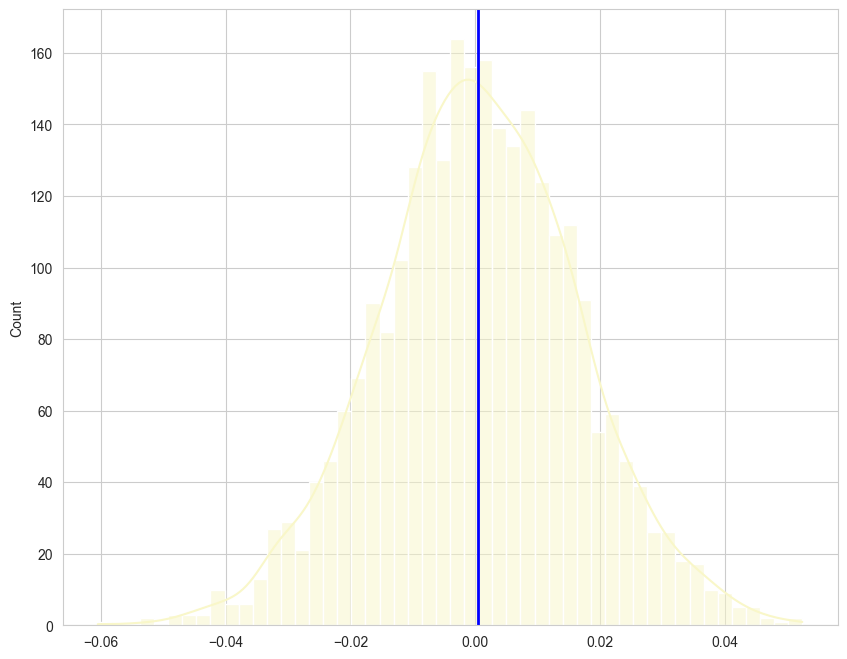

In [39]:
# plot mean

plt.rcParams['figure.figsize'] = (10.0, 8.0)

sns.histplot(stock_bdms, color = '#F9F7C9', bins = 50, kde = True)

plt.axvline(np.mean(stock_bdms), color = 'Blue', linewidth = 2)
print(f'Stock BDMS mean: {np.mean(stock_bdms):.4}%')

### Median

In [40]:
numbers = (1, 3, 5, 7, 9, 2, 4) # sorted 1, 2, 3, 4, 5, 7, 9
np.median(numbers)

4.0

Mean: 0.00044%
Median: 0.00039%


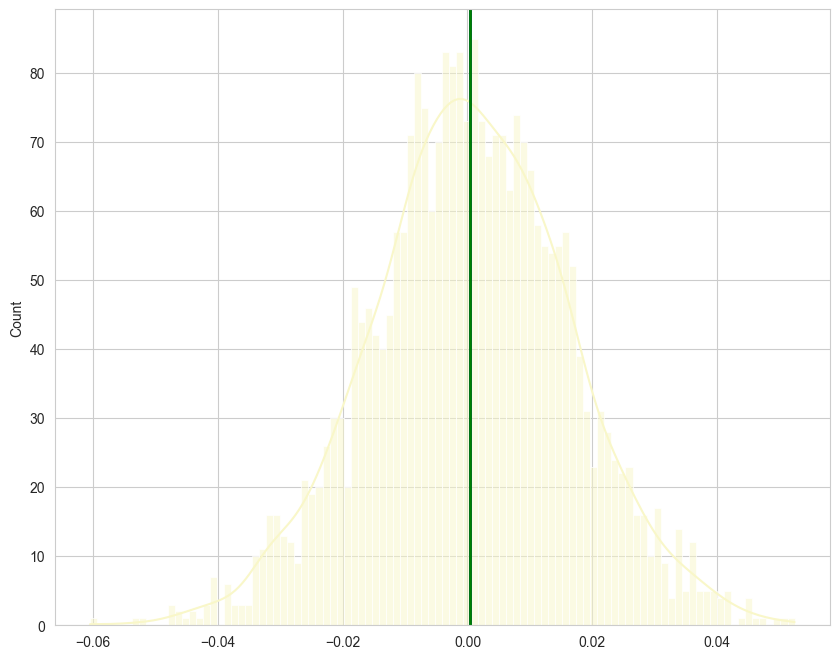

In [41]:
sns.histplot(stock_bdms, color='#F9F7C9', bins = 100, kde = True)
plt.axvline(np.mean(stock_bdms), color = 'Blue', linewidth = 2)
plt.axvline(np.median(stock_bdms), color = 'Green', linewidth = 2)
print(f'Mean: { np.round(np.mean(stock_bdms), 5)}%')
print(f'Median: { np.round(np.median(stock_bdms), 5)}%')

### Skew

- Mean > Median --> Skew to the right
- Mean < Median --> Skew to the left

In [42]:
from scipy.stats import skewnorm

In [43]:
stock_a = skewnorm.rvs(10, size = 1000)
stock_a

array([ 9.05572454e-01,  1.68870991e+00,  1.48338929e+00,  6.59983793e-01,
        1.09049308e+00,  3.80311914e-01,  9.94171342e-01,  1.40383434e+00,
        3.44697040e-01,  1.94117847e+00,  3.12536436e-01,  4.84039454e-01,
        2.35553377e+00,  5.80087282e-01,  1.10809311e+00,  2.32110187e-01,
        1.79288865e+00,  3.54234897e-01,  4.95129898e-01,  9.07158894e-01,
        1.41518395e-01,  7.73628148e-02,  1.84644577e-01,  1.86909788e-01,
        1.05048204e+00,  1.76925270e+00,  6.98572213e-01,  2.63647113e-01,
       -1.62833653e-03,  5.45252069e-01, -1.92530805e-02,  5.25160409e-01,
        8.25279889e-01,  1.07149623e+00,  9.34365191e-01,  4.89570077e-01,
        9.55288414e-01,  3.17874061e-01,  3.47268648e-02,  1.73832183e-02,
        2.40078671e+00,  9.20320741e-01,  1.65821886e+00,  5.98066857e-01,
        1.30405217e+00,  2.82539184e-01,  6.01465194e-01,  3.86012480e-01,
        1.57604060e+00,  4.67947085e-01,  7.97999039e-01,  1.14436302e+00,
        1.62651729e+00,  

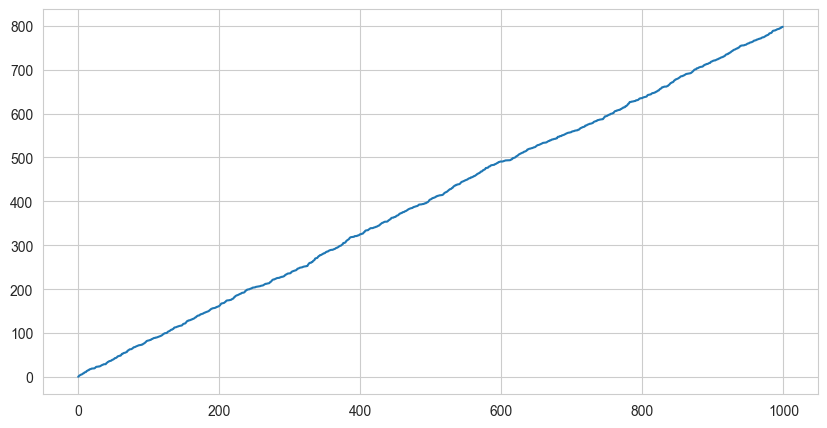

In [44]:
# plot

plt.rcParams['figure.figsize'] = (10.0, 5.0)

plt.plot(np.cumsum(stock_a))
plt.show()

<AxesSubplot: ylabel='Count'>

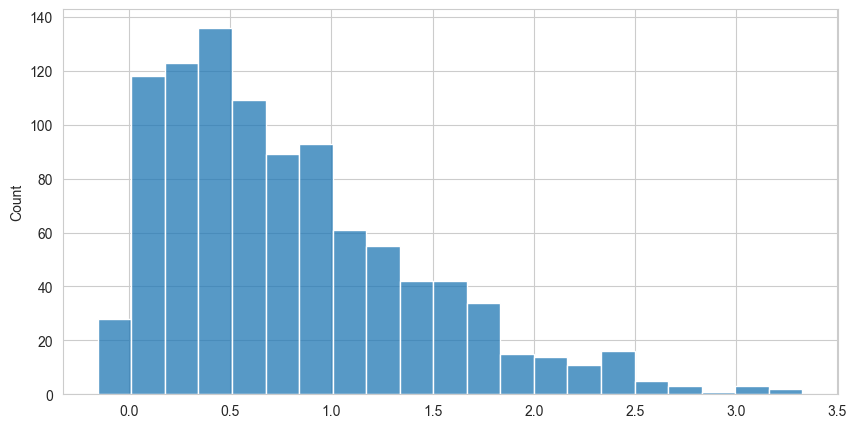

In [45]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)

sns.histplot(stock_a)

Mean: 0.79735%
Median: 0.64627%


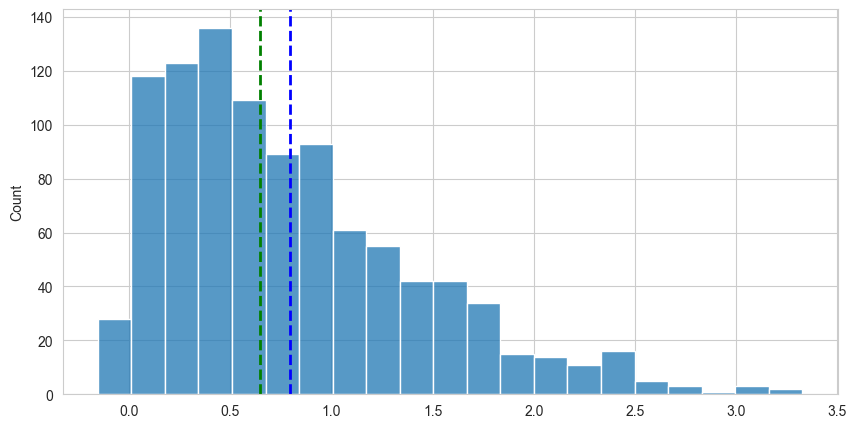

In [46]:
# Mean > Median --> Skew to the right

plt.rcParams['figure.figsize'] = (10.0, 5.0)

sns.histplot(stock_a)

plt.axvline(np.mean(stock_a), color = 'Blue', linewidth = 2, linestyle = '--')
plt.axvline(np.median(stock_a), color = 'Green', linewidth = 2, linestyle = '--')

print(f'Mean: {np.round(np.mean(stock_a), 5)}%')
print(f'Median: {np.round(np.median(stock_a), 5)}%')

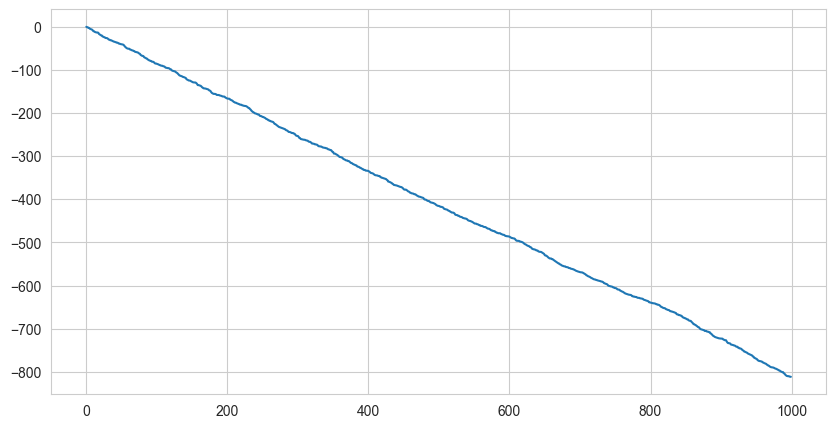

In [47]:
# Mean < Median --> Skew to the left

stock_b = skewnorm.rvs(-10, size = 1000)
plt.plot(np.cumsum(stock_b));

Mean: -0.81094%
Median: -0.67847%


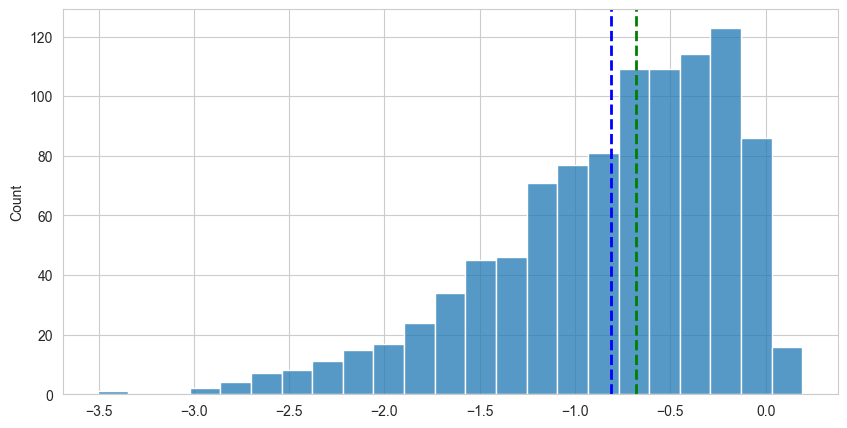

In [48]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)

sns.histplot(stock_b)

plt.axvline(np.mean(stock_b), color = 'Blue', linewidth = 2, linestyle = '--')
plt.axvline(np.median(stock_b), color = 'Green', linewidth = 2, linestyle = '--')

print(f'Mean: {np.round(np.mean(stock_b), 5)}%')
print(f'Median: {np.round(np.median(stock_b), 5)}%')

Mean: -0.78304%
Median: -0.66622%


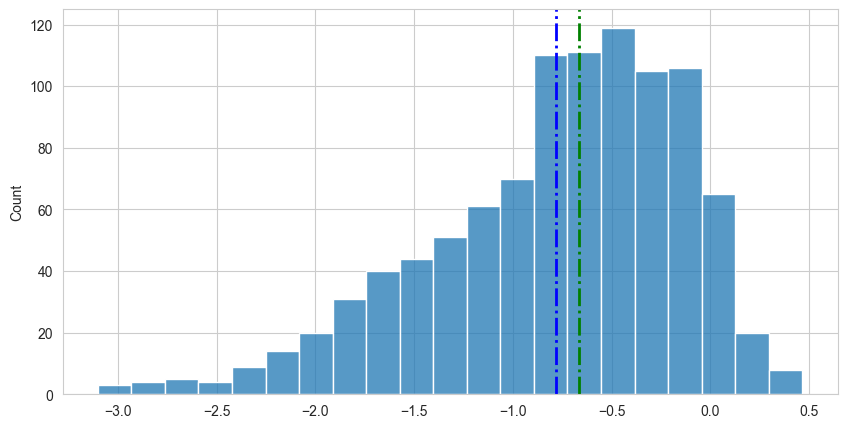

In [49]:
stock_c = skewnorm.rvs(-5, size = 1000)

sns.histplot(stock_c)

plt.axvline(np.mean(stock_c), color = 'Blue', linewidth = 2, linestyle = '-.') # dash-dot line style
plt.axvline(np.median(stock_c), color = 'Green', linewidth = 2, linestyle = '-.')

print(f'Mean: {np.round(np.mean(stock_c), 5)}%')
print(f'Median: {np.round(np.median(stock_c), 5)}%')

Mean: -0.71875%
Median: -0.6807%


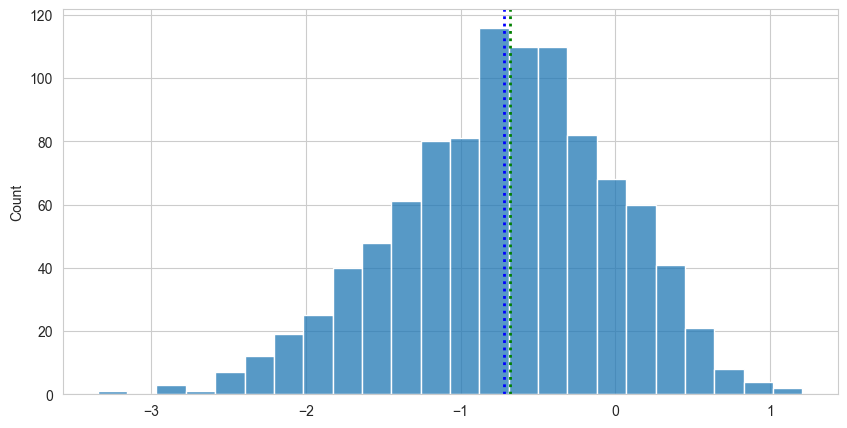

In [50]:
stock_d = skewnorm.rvs(-2, size = 1000)

sns.histplot(stock_d)

plt.axvline(np.mean(stock_d), color = 'Blue', linewidth = 2, linestyle = ':') # dotted line style
plt.axvline(np.median(stock_d), color = 'Green', linewidth = 2, linestyle = ':')

print(f'Mean: {np.round(np.mean(stock_d), 5)}%')
print(f'Median: {np.round(np.median(stock_d), 5)}%')

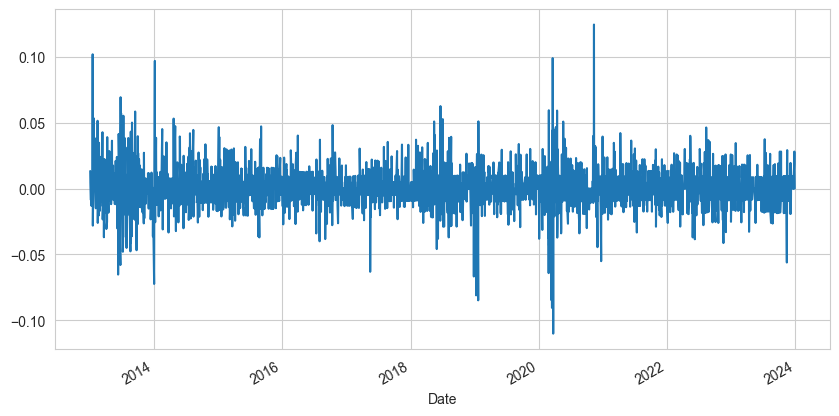

In [51]:
bdms_pct.plot();

Mean: 0.00046%
Median: 0.0%


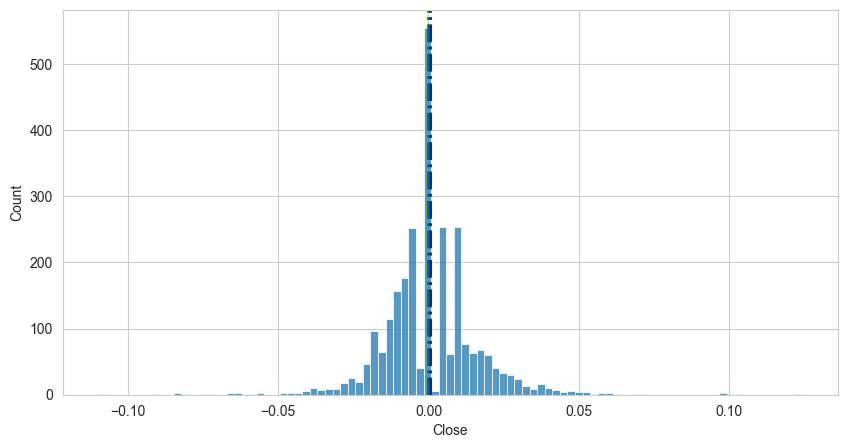

In [52]:
# plot bdms_pct

sns.histplot(bdms_pct)

plt.axvline(np.mean(bdms_pct), color = 'Blue', linewidth = 2, linestyle = '-.') # dash-dot line style
plt.axvline(np.median(bdms_pct), color = 'Green', linewidth = 2, linestyle = '-.')

print(f'Mean: {np.round(np.mean(bdms_pct), 5)}%')
print(f'Median: {np.round(np.median(bdms_pct), 5)}%')

### Quantile and Percentile

In [53]:
bdms_pct.quantile(0.25) * 100

-0.8771929824561431

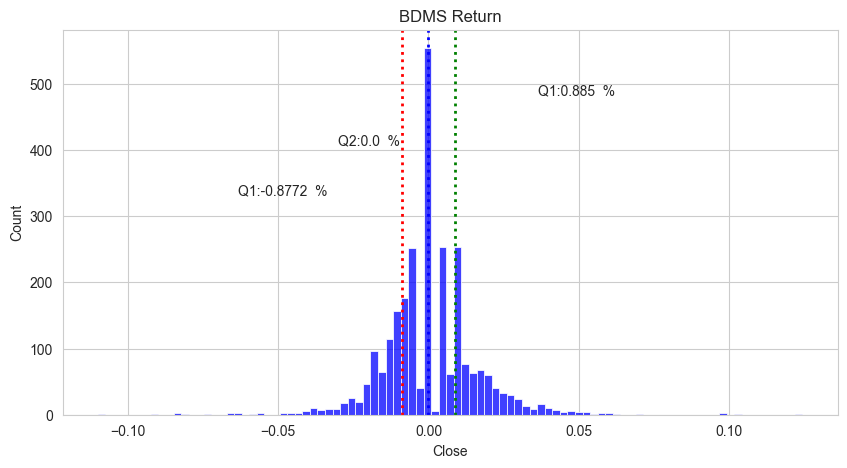

In [54]:
sns.histplot(bdms_pct, color = 'blue')
plt.title("BDMS Return")

q1 = bdms_pct.quantile(0.25)
q2 = bdms_pct.quantile(0.5)
q3 = bdms_pct.quantile(0.75)

plt.axvline(x = q1, linewidth = 2, color = 'Red', linestyle = ':')
plt.figtext(0.3, 0.55, f"Q1:{q1 * 100:.4}  %", fontsize = 10)

plt.axvline(x = q2, linewidth = 2, color = 'Blue', linestyle = ':')
plt.figtext(0.4, 0.65, f"Q2:{q2 * 100:.4}  %", fontsize = 10)

plt.axvline(x = q3, linewidth = 2, color = 'Green', linestyle = ':')
plt.figtext(0.6, 0.75, f"Q1:{q3 * 100:.4}  %", fontsize = 10)
plt.show()

### Percentile

In [55]:
np.percentile(bdms_pct, 1) * 100 # at percentile #1

-3.9005054063410234

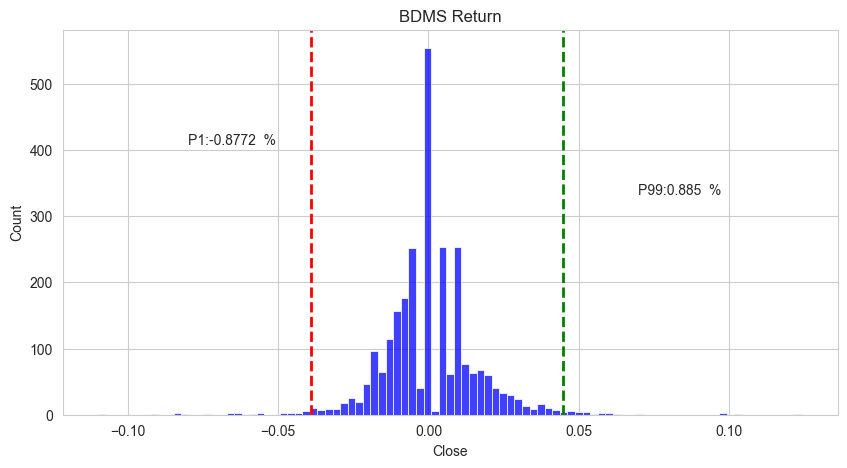

In [56]:
sns.histplot(bdms_pct, color = 'blue')
plt.title("BDMS Return")

p1 = np.percentile(bdms_pct, 1) # P1
p99 = np.percentile(bdms_pct, 99) # P99

plt.axvline(x = p1, linewidth = 2, color = 'Red', linestyle = '--')
plt.figtext(0.25, 0.65, f"P1:{q1 * 100:.4}  %", fontsize = 10)

plt.axvline(x = p99, linewidth = 2, color = 'Green', linestyle = '--')
plt.figtext(0.70, 0.55, f"P99:{q3 * 100:.4}  %", fontsize = 10)
plt.show()

### Variance and Standard Deviation

In [57]:
# 2 sets of 5 numbers that have the same mean but different standard deviations

set1 = (21, 19, 22, 18, 20) # 21%, 19%, 22%, 18%, and 20% in 5 years rang
set2 = (55, -15, -25, 55, 30)

print(f'Mean of SET1: {np.mean(set1)}')
print(f'Mean of SET2: {np.mean(set2)}')

Mean of SET1: 20.0
Mean of SET2: 20.0


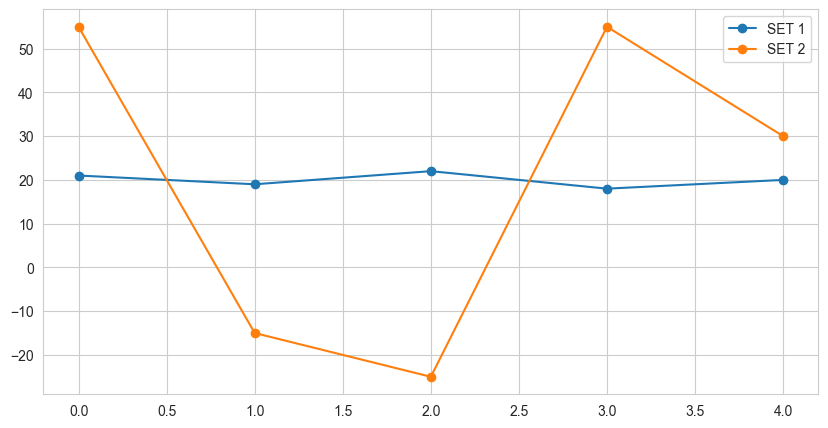

In [58]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)

plt.plot(set1, label = "SET 1", marker='o')
plt.plot(set2, label = "SET 2", marker='o')
plt.legend()
plt.show()

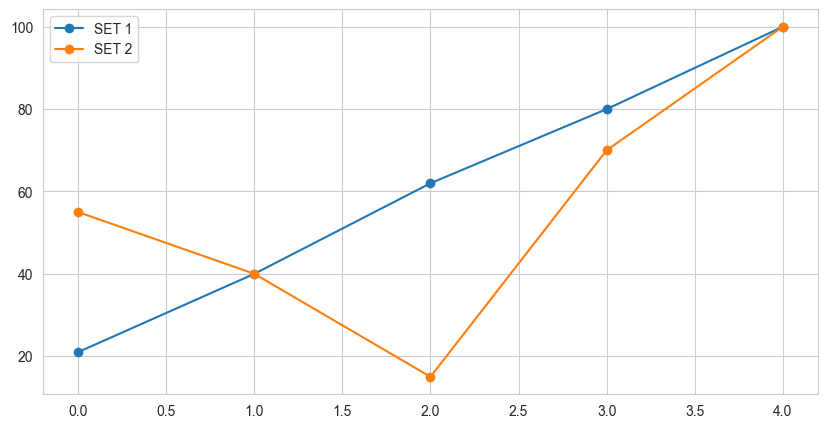

In [59]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)

plt.plot(np.cumsum(set1), label = "SET 1", marker='o')
plt.plot(np.cumsum(set2), label = "SET 2", marker='o')
plt.legend()
plt.show()

#### What are the symbols we need to write?
- Hat: \hat
- Bar: \bar
- Square root: \sqrt{}
- Subscript: _{}
- Sum: \sum
- Limits of sum: \limits _{} ^{}
- Beta: \beta

- Note $$ : All the Math you want to write in the markdown should be inside opening and closing $ symbol in order to be processed as Math.
- \beta : Creates the symbol beta
- \hat{} : A hat is covered over anything inside the curly braces of \hat{}. E.g. in \hat{Y} hat is created over Y and in \hat{\beta}_{0},  hat is shown over beta
- _{} : Creates as subscript, anything inside the curly braces after _. E.g. \hat{\beta}_{0} will create beta with a hat and give it a subscript of 0.
- ^{} : (Similar to subscript) Creates as superscript, anything inside the curly braces after ^.
- \sum : Creates the summation symbol
- \limits _{} ^{} : Creates lower and upper limit for the \sum using the subscript and superscript notation.



### Variance

$$
{S}^2 = \frac{{\sum(X - \bar{X})}^2}{N - 1}
$$

In [60]:
set1, np.mean(set1), len(set1)

((21, 19, 22, 18, 20), 20.0, 5)

In [61]:
set2

(55, -15, -25, 55, 30)

In [62]:
# apply for loop

sum_set1 = 0

for n in range(0, len(set1)):

    diff = (set1[n] - np.mean(set1)) ** 2
    print(diff)

    sum_set1 += diff

print(f'SUM diff: {sum_set1}')
print(f'VAR: {sum_set1/len(set1)}')

1.0
1.0
4.0
4.0
0.0
SUM diff: 10.0
VAR: 2.0


In [63]:
# apply for loop

sum_set2 = 0

for n in range(0, len(set2)):

    diff = (set2[n] - np.mean(set2)) ** 2
    print(diff)

    sum_set2 += diff

print(f'SUM diff: {sum_set2}')
print(f'VAR: {sum_set2/len(set2)}')

1225.0
1225.0
2025.0
1225.0
100.0
SUM diff: 5800.0
VAR: 1160.0


In [64]:
# apply Vectorization

np.sum(((set1 - np.mean(set1)) ** 2)) / len(set1)

2.0

In [65]:
# apply Vectorization

np.sum(((set2 - np.mean(set2)) ** 2)) / len(set2)

1160.0

In [66]:
# apply build-in function

var_set1 = np.var(set1)
var_set1

2.0

In [67]:
# apply build-in function

var_set2 = np.var(set2)
var_set2

1160.0

### Standard Deviation (Volatility)

$$
S = \sqrt{\frac{{\sum(X - \bar{X})}^2}{N - 1}}
$$

In [68]:
var_set1 ** (1/2)

1.4142135623730951

In [69]:
var_set2 ** 0.5

34.058772731852805

In [70]:
print(f'Standard Deviation of system A:{var_set1 ** 0.5:.4f}')
print(f'Standard Deviation of system B:{var_set2 ** 0.5:.4f}')

Standard Deviation of system A:1.4142
Standard Deviation of system B:34.0588


In [71]:
# apply to real data

gulf = pd.read_csv('Data/SET50_download_r2/GULF.BK.csv', index_col = 0)
gulf.set_index(pd.to_datetime(gulf.index), inplace = True)
gulf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-06,11.370276,11.765764,10.332120,10.628736,10.045855,1230996513
2017-12-07,10.678172,10.678172,10.035504,10.084940,9.531880,268224149
2017-12-08,10.332120,10.925352,10.332120,10.826480,10.232754,297947437
2017-12-12,10.875916,10.875916,10.430992,10.430992,9.858955,160721992
2017-12-13,10.480428,10.727608,10.332120,10.678172,10.092581,113506386


In [72]:
gulf.index

DatetimeIndex(['2017-12-06', '2017-12-07', '2017-12-08', '2017-12-12',
               '2017-12-13', '2017-12-14', '2017-12-15', '2017-12-18',
               '2017-12-19', '2017-12-20',
               ...
               '2024-02-12', '2024-02-13', '2024-02-14', '2024-02-15',
               '2024-02-16', '2024-02-19', '2024-02-20', '2024-02-21',
               '2024-02-22', '2024-02-23'],
              dtype='datetime64[ns]', name='Date', length=1512, freq=None)

In [73]:
# setting

start = '2018'
end = '2023'

In [74]:
gulf = gulf[start : end]
gulf.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,45.50,45.50,44.50,44.75,44.75,13952200
2023-12-25,44.75,45.25,44.50,44.50,44.50,6274000
2023-12-26,44.50,44.75,43.75,44.25,44.25,15313000
2023-12-27,44.50,45.00,44.00,44.25,44.25,14321200
2023-12-28,44.50,44.75,44.25,44.50,44.50,14613400


In [75]:
# add a new calculated column for log return

gulf['log_return'] = np.log(gulf['Close']/gulf['Close'].shift(1))
gulf.head()

,Open,High,Low,Close,Adj Close,Volume,log_return
Date,,,,,,,
2018-01-03,12.902792,13.693767,12.902792,13.594895,12.849349,393597397,NaN
2018-01-04,13.545459,13.743203,13.248843,13.693767,12.942799,283553064,0.007246
2018-01-05,13.792639,13.842075,13.594895,13.594895,12.849349,147190351,-0.007246
2018-01-08,13.397151,13.644331,13.347715,13.496023,12.755899,49365356,-0.007299
2018-01-09,13.446587,13.446587,13.446587,13.446587,12.709174,1481714,-0.003670


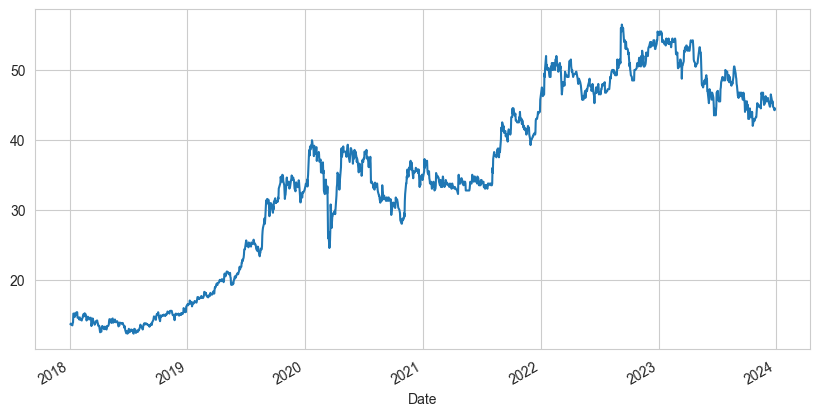

In [76]:
gulf['Close'].plot();

In [77]:
# variance

var = np.var(gulf['log_return'])

print(f'Variance of GULF from {start} to {end}: {var:.6f}')

Variance of GULF from 2018 to 2023: 0.000387


In [78]:
# Standard Deviation

std = np.std(gulf['log_return'])

print(f'Standard Deviation of GULF from {start} to {end}: {std:.6f}')

Standard Deviation of GULF from 2018 to 2023: 0.019679


In [79]:
gulf['log_return'].rolling(21).std()

Date
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
2018-01-09         NaN
                ...   
2023-12-22    0.012534
2023-12-25    0.011748
2023-12-26    0.011781
2023-12-27    0.011274
2023-12-28    0.011277
Name: log_return, Length: 1457, dtype: float64

In [80]:
gulf['log_return'].rolling(21).std().head(25)

Date
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
2018-01-09         NaN
2018-01-10         NaN
2018-01-11         NaN
2018-01-12         NaN
2018-01-15         NaN
2018-01-16         NaN
2018-01-17         NaN
2018-01-18         NaN
2018-01-19         NaN
2018-01-22         NaN
2018-01-23         NaN
2018-01-24         NaN
2018-01-25         NaN
2018-01-26         NaN
2018-01-29         NaN
2018-01-30         NaN
2018-01-31         NaN
2018-02-01    0.027428
2018-02-02    0.027897
2018-02-05    0.027846
2018-02-06    0.027793
Name: log_return, dtype: float64

### Detecting Outlier

In [81]:
# preprocessing data

gulf_outliners = gulf['log_return'].rolling(42).agg(['mean', 'std'])
gulf_outliners.head()

,mean,std
Date,,
2018-01-03,NaN,NaN
2018-01-04,NaN,NaN
2018-01-05,NaN,NaN
2018-01-08,NaN,NaN
2018-01-09,NaN,NaN


In [82]:
gulf_outliners.tail()

,mean,std
Date,,
2023-12-22,0.001510,0.012231
2023-12-25,0.000816,0.011770
2023-12-26,0.000821,0.011767
2023-12-27,0.000821,0.011767
2023-12-28,0.000816,0.011765


In [83]:
gulf_outliners = gulf.join(gulf_outliners)
gulf_outliners.head()

,Open,High,Low,Close,Adj Close,Volume,log_return,mean,std
Date,,,,,,,,,
2018-01-03,12.902792,13.693767,12.902792,13.594895,12.849349,393597397,NaN,NaN,NaN
2018-01-04,13.545459,13.743203,13.248843,13.693767,12.942799,283553064,0.007246,NaN,NaN
2018-01-05,13.792639,13.842075,13.594895,13.594895,12.849349,147190351,-0.007246,NaN,NaN
2018-01-08,13.397151,13.644331,13.347715,13.496023,12.755899,49365356,-0.007299,NaN,NaN
2018-01-09,13.446587,13.446587,13.446587,13.446587,12.709174,1481714,-0.003670,NaN,NaN


In [84]:
gulf_outliners.tail()

,Open,High,Low,Close,Adj Close,Volume,log_return,mean,std
Date,,,,,,,,,
2023-12-22,45.50,45.50,44.50,44.75,44.75,13952200,-0.016621,0.001510,0.012231
2023-12-25,44.75,45.25,44.50,44.50,44.50,6274000,-0.005602,0.000816,0.011770
2023-12-26,44.50,44.75,43.75,44.25,44.25,15313000,-0.005634,0.000821,0.011767
2023-12-27,44.50,45.00,44.00,44.25,44.25,14321200,0.000000,0.000821,0.011767
2023-12-28,44.50,44.75,44.25,44.50,44.50,14613400,0.005634,0.000816,0.011765


In [85]:
# detecting outlier function

def outlier_detection(df, n_sigmas = 3):

    x = df['log_return'] # return
    mu = df['mean']
    sigma = df['std']

    if (x > mu + sigma * n_sigmas) | (x < mu - sigma * n_sigmas):
        return 1
    else:
        return 0

In [86]:
gulf_outliners['outlier'] = gulf_outliners.apply(outlier_detection, axis = 1)
gulf_outliners.head()

,Open,High,Low,Close,Adj Close,Volume,log_return,mean,std,outlier
Date,,,,,,,,,,
2018-01-03,12.902792,13.693767,12.902792,13.594895,12.849349,393597397,NaN,NaN,NaN,0
2018-01-04,13.545459,13.743203,13.248843,13.693767,12.942799,283553064,0.007246,NaN,NaN,0
2018-01-05,13.792639,13.842075,13.594895,13.594895,12.849349,147190351,-0.007246,NaN,NaN,0
2018-01-08,13.397151,13.644331,13.347715,13.496023,12.755899,49365356,-0.007299,NaN,NaN,0
2018-01-09,13.446587,13.446587,13.446587,13.446587,12.709174,1481714,-0.003670,NaN,NaN,0


In [87]:
gulf_outliners.tail()

,Open,High,Low,Close,Adj Close,Volume,log_return,mean,std,outlier
Date,,,,,,,,,,
2023-12-22,45.50,45.50,44.50,44.75,44.75,13952200,-0.016621,0.001510,0.012231,0
2023-12-25,44.75,45.25,44.50,44.50,44.50,6274000,-0.005602,0.000816,0.011770,0
2023-12-26,44.50,44.75,43.75,44.25,44.25,15313000,-0.005634,0.000821,0.011767,0
2023-12-27,44.50,45.00,44.00,44.25,44.25,14321200,0.000000,0.000821,0.011767,0
2023-12-28,44.50,44.75,44.25,44.50,44.50,14613400,0.005634,0.000816,0.011765,0


In [88]:
# filter data

condition = gulf_outliners['outlier'] == 1
condition

Date
2018-01-03    False
2018-01-04    False
2018-01-05    False
2018-01-08    False
2018-01-09    False
              ...  
2023-12-22    False
2023-12-25    False
2023-12-26    False
2023-12-27    False
2023-12-28    False
Name: outlier, Length: 1457, dtype: bool

In [89]:
gulf_outliners[condition]

,Open,High,Low,Close,Adj Close,Volume,log_return,mean,std,outlier
Date,,,,,,,,,,
2019-05-16,20.268753,20.466497,18.884546,19.329470,18.591843,149157036,-0.047450,0.002099,0.015564,1
2019-08-21,24.816864,26.497686,24.717993,26.299944,25.296320,93483522,0.062035,0.003775,0.018716,1
2019-09-02,28.475126,31.737902,28.475126,31.342415,30.146366,118194772,0.089021,0.005182,0.022933,1
2020-01-13,35.198421,38.263451,35.099548,38.263451,36.803291,122929178,0.089128,0.002943,0.023230,1
2020-03-11,33.023235,33.319855,29.463846,29.958206,29.034424,108313306,-0.106350,-0.003704,0.033451,1
2020-03-12,26.695431,27.486406,23.234913,25.904455,25.105673,176602631,-0.145388,-0.009288,0.036966,1
2020-07-23,35.099548,35.593910,32.874928,33.863647,32.819435,263421372,-0.077231,-0.003244,0.022793,1
2020-11-05,29.500000,31.500000,29.500000,31.250000,30.286385,61092300,0.074724,-0.000565,0.020659,1
2021-04-20,33.000000,34.750000,32.750000,34.250000,33.563564,90326000,0.060169,-0.000516,0.015386,1


In [90]:
gulf_outliners[condition].shape

(18, 10)

In [91]:
outliers = gulf_outliners.loc[gulf_outliners['outlier'] == 1, ['log_return']] # get only column 'log_return and it's index
outliers

,log_return
Date,
2019-05-16,-0.047450
2019-08-21,0.062035
2019-09-02,0.089021
2020-01-13,0.089128
2020-03-11,-0.106350
2020-03-12,-0.145388
2020-07-23,-0.077231
2020-11-05,0.074724
2021-04-20,0.060169


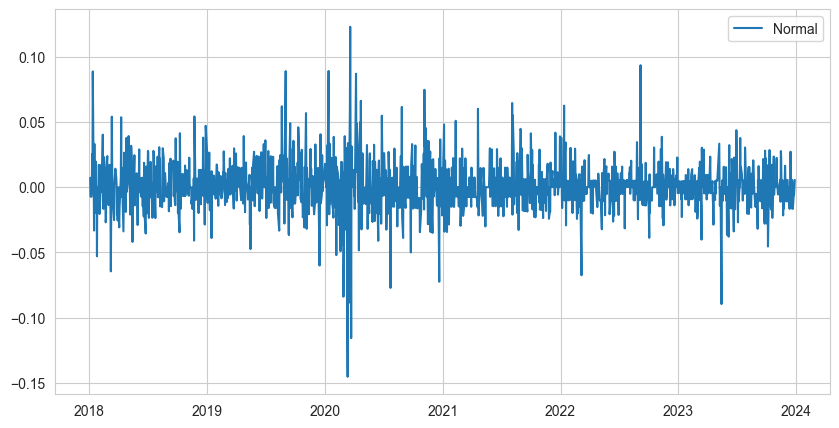

In [92]:
# plot

plt.rcParams['figure.figsize'] = (10.0, 5.0)

fig, ax = plt.subplots()

ax.plot(gulf_outliners.index, gulf_outliners['log_return'], label = 'Normal')

ax.legend()
plt.show()

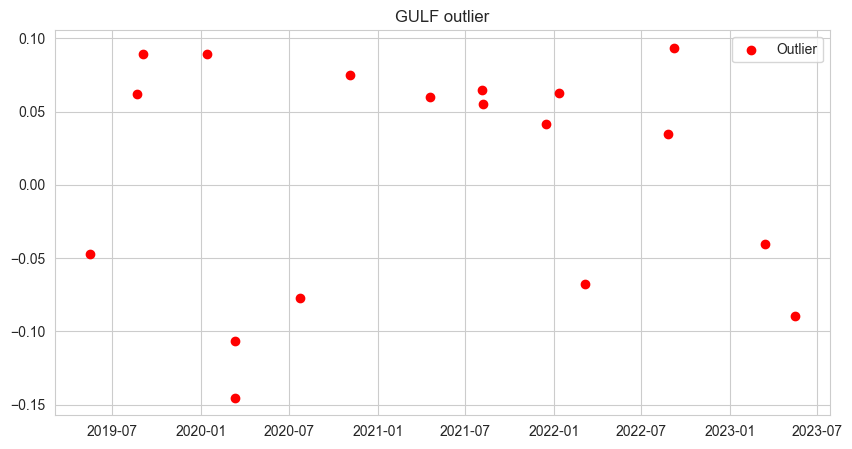

In [93]:
# plot

plt.rcParams['figure.figsize'] = (10.0, 5.0)

fig, ax = plt.subplots()

ax.scatter(outliers.index, outliers['log_return'], color = 'Red', label = 'Outlier')

ax.set_title(f'GULF outlier')
ax.legend()
plt.show()

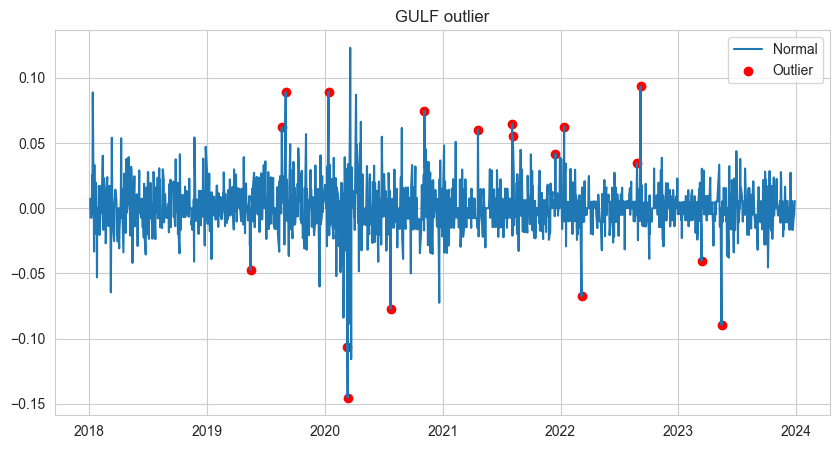

In [94]:
# plot

plt.rcParams['figure.figsize'] = (10.0, 5.0)

fig, ax = plt.subplots()

ax.plot(gulf_outliners.index, gulf_outliners['log_return'], label = 'Normal')
ax.scatter(outliers.index, outliers['log_return'], color = 'Red', label = 'Outlier')

ax.set_title(f'GULF outlier')
ax.legend()
plt.show()

### Covariance VS Correlation

#### Covariance
- Use to consider if 2 parameters are correlated or not

$$
COV(X, Y) = \frac{{{\sum}^n}_{i=1}({X}_i - \bar{X})({Y}_i - \bar{Y})}{n - 1}
$$

#### Correlation
- Use to consider how much for correlation between 2 parameters

$$
COR(X, Y) = \frac{COV(X, Y)}{{\sigma}_X{\sigma}_Y}
$$

In [96]:
# load csv files to dataframes

ais = pd.read_csv('Data/SET50_download_r2/ADVANC.BK.csv', index_col = 0)
ais.set_index(pd.to_datetime(ais.index), inplace = True)

true = pd.read_csv('Data/SET50_download_r2/TRUE.BK.csv', index_col = 0)
true.set_index(pd.to_datetime(ais.index), inplace = True)

In [97]:
# setting

start = '2015'
end = '2020'

In [98]:
ais = ais[start:end]['Close']
true = true[start:end]['Close']

In [99]:
np.cov(ais, true)

array([[697.87839551,  31.65727831],
       [ 31.65727831,   6.1125681 ]])

In [100]:
np.corrcoef(ais, true)

array([[1.        , 0.48469869],
       [0.48469869, 1.        ]])

Covariance: 31.6573
Correlation: 0.4847


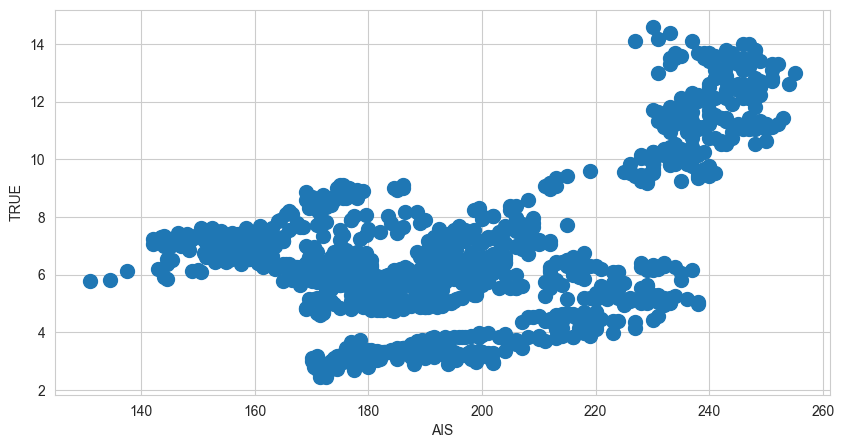

In [101]:
# plot 

plt.rcParams['figure.figsize'] = (10.0, 5.0)

plt.scatter(ais, true, s = 100)

plt.xlabel("AIS")
plt.ylabel("TRUE")

print(f'Covariance: {np.cov(ais, true)[0,1]:.4f}')
print(f'Correlation: {np.corrcoef(ais, true)[0,1]:.4f}')

plt.show()

In [102]:
# return

ais_pct = ais.pct_change()
ais_pct.dropna(inplace = True)

true_pct = true.pct_change()
true_pct.dropna(inplace = True)

In [103]:
np.cov(ais_pct, true_pct)

array([[0.00025594, 0.00016071],
       [0.00016071, 0.00052526]])

In [104]:
np.corrcoef(ais_pct, true_pct)

array([[1.        , 0.43831958],
       [0.43831958, 1.        ]])

Covariance: 0.0002
Correlation: 0.4383


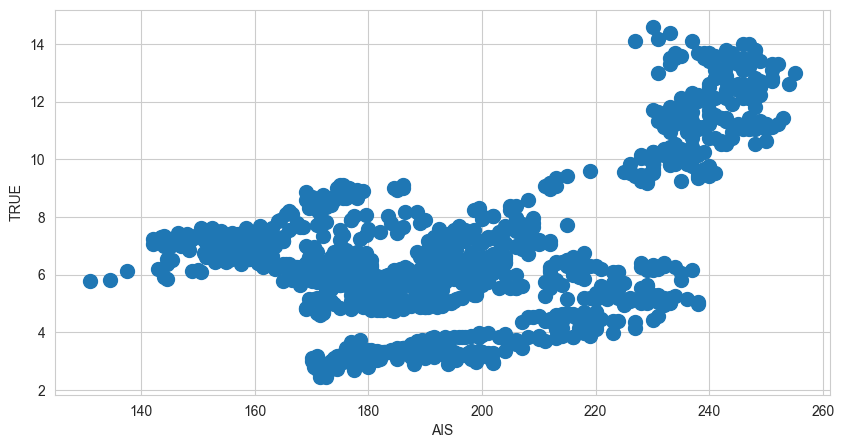

In [105]:
# plot 

plt.rcParams['figure.figsize'] = (10.0, 5.0)

plt.scatter(ais, true, s = 100)

plt.xlabel("AIS")
plt.ylabel("TRUE")

print(f'Covariance: {np.cov(ais_pct, true_pct)[0,1]:.4f}')
print(f'Correlation: {np.corrcoef(ais_pct, true_pct)[0,1]:.4f}')

plt.show()

Correlation: 0.4383


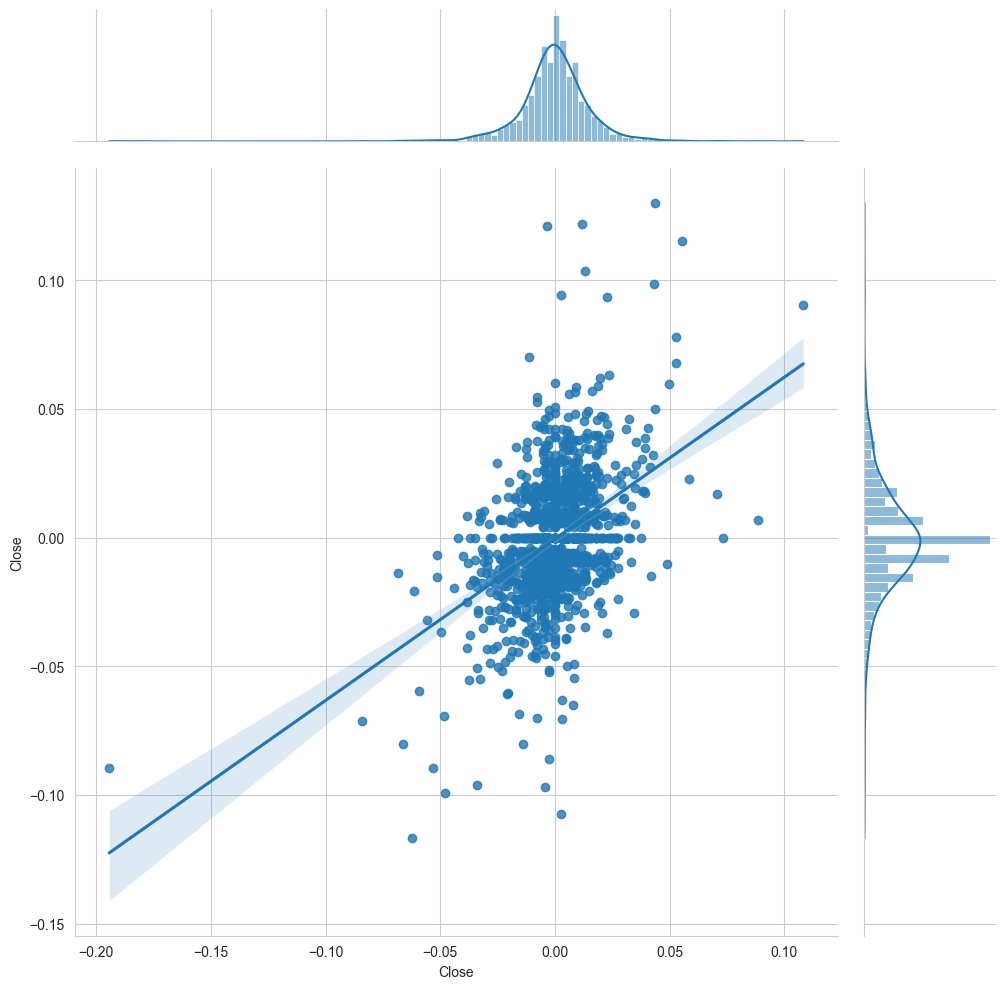

In [108]:
sns.jointplot(x = ais_pct, y = true_pct, kind = 'reg', height = 10);
print(f'Correlation: {np.corrcoef(ais_pct, true_pct)[0,1]:.4f}')

In [111]:
# multiple stocks

stock_list = ['BBL.BK', 'KBANK.BK', 'KTB.BK', 'KTC.BK', 'LH.BK', 'SCB.BK']

bank_port = pd.DataFrame() # create empty dataframe

In [113]:
for s in range(0, len(stock_list)):
    bank_port[s] = pd.read_csv(f'Data/SET50_download_r2/{stock_list[s]}.csv', index_col = 0)['2018':'2023']['Close']

In [114]:
bank_port.head()

,0,1,2,3,4,5
Date,,,,,,
2018-01-03,205.0,237.0,19.400000,18.450001,10.6,NaN
2018-01-04,205.0,242.0,19.700001,18.100000,10.5,NaN
2018-01-05,206.0,241.0,19.900000,17.100000,10.6,NaN
2018-01-08,207.0,241.0,19.900000,17.650000,10.6,NaN
2018-01-09,208.0,235.0,20.500000,17.600000,10.7,NaN


In [115]:
bank_port.shape

(1214, 6)

In [116]:
bank_port.columns = stock_list
bank_port.dropna(inplace = True)
bank_port.head()

,BBL.BK,KBANK.BK,KTB.BK,KTC.BK,LH.BK,SCB.BK
Date,,,,,,
2022-04-20,137.0,157.5,13.1,59.25,9.35,81.5
2022-04-27,131.0,151.5,14.7,57.00,9.50,114.0
2022-04-28,131.0,153.5,15.2,57.25,9.50,112.5
2022-04-29,130.5,153.0,15.2,57.75,9.55,115.0
2022-05-03,130.0,151.0,14.9,57.50,9.45,117.5


In [118]:
bank_port.shape

(166, 6)

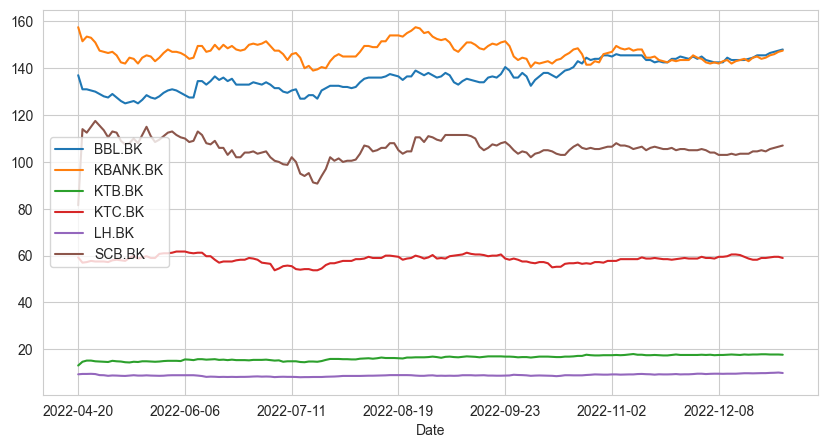

In [117]:
bank_port.plot();

In [119]:
bank_port_rets = bank_port.pct_change()
bank_port_rets

,BBL.BK,KBANK.BK,KTB.BK,KTC.BK,LH.BK,SCB.BK
Date,,,,,,
2022-04-20,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-27,-0.043796,-0.038095,0.122137,-0.037975,0.016043,0.398773
2022-04-28,0.000000,0.013201,0.034014,0.004386,0.000000,-0.013158
2022-04-29,-0.003817,-0.003257,0.000000,0.008734,0.005263,0.022222
2022-05-03,-0.003831,-0.013072,-0.019737,-0.004329,-0.010471,0.021739
...,...,...,...,...,...,...
2022-12-26,0.000000,0.003472,0.000000,0.000000,0.000000,-0.004762
2022-12-27,0.006873,0.006920,-0.005587,0.004237,0.010152,0.009569
2022-12-28,0.003413,0.003436,0.000000,0.004219,0.005025,0.004739


In [120]:
bank_port_rets.dropna(inplace = True)

In [121]:
bank_port_rets

,BBL.BK,KBANK.BK,KTB.BK,KTC.BK,LH.BK,SCB.BK
Date,,,,,,
2022-04-27,-0.043796,-0.038095,0.122137,-0.037975,0.016043,0.398773
2022-04-28,0.000000,0.013201,0.034014,0.004386,0.000000,-0.013158
2022-04-29,-0.003817,-0.003257,0.000000,0.008734,0.005263,0.022222
2022-05-03,-0.003831,-0.013072,-0.019737,-0.004329,-0.010471,0.021739
2022-05-05,-0.007692,-0.023179,-0.006711,0.000000,-0.047619,-0.017021
...,...,...,...,...,...,...
2022-12-26,0.000000,0.003472,0.000000,0.000000,0.000000,-0.004762
2022-12-27,0.006873,0.006920,-0.005587,0.004237,0.010152,0.009569
2022-12-28,0.003413,0.003436,0.000000,0.004219,0.005025,0.004739


In [122]:
bank_port_rets.cov() # covariance

,BBL.BK,KBANK.BK,KTB.BK,KTC.BK,LH.BK,SCB.BK
BBL.BK,0.000112,0.000081,0.000032,0.000033,0.000022,-0.000002
KBANK.BK,0.000081,0.000123,0.000020,0.000030,0.000020,0.000012
KTB.BK,0.000032,0.000020,0.000226,0.000009,0.000046,0.000385
KTC.BK,0.000033,0.000030,0.000009,0.000126,0.000047,-0.000033
LH.BK,0.000022,0.000020,0.000046,0.000047,0.000129,0.000079
SCB.BK,-0.000002,0.000012,0.000385,-0.000033,0.000079,0.001224


In [123]:
bank_port_rets.corr() # correlation

,BBL.BK,KBANK.BK,KTB.BK,KTC.BK,LH.BK,SCB.BK
BBL.BK,1.000000,0.689466,0.199548,0.277774,0.185397,-0.004878
KBANK.BK,0.689466,1.000000,0.118678,0.244403,0.154405,0.030739
KTB.BK,0.199548,0.118678,1.000000,0.051769,0.270400,0.731906
KTC.BK,0.277774,0.244403,0.051769,1.000000,0.368538,-0.082737
LH.BK,0.185397,0.154405,0.270400,0.368538,1.000000,0.198907
SCB.BK,-0.004878,0.030739,0.731906,-0.082737,0.198907,1.000000


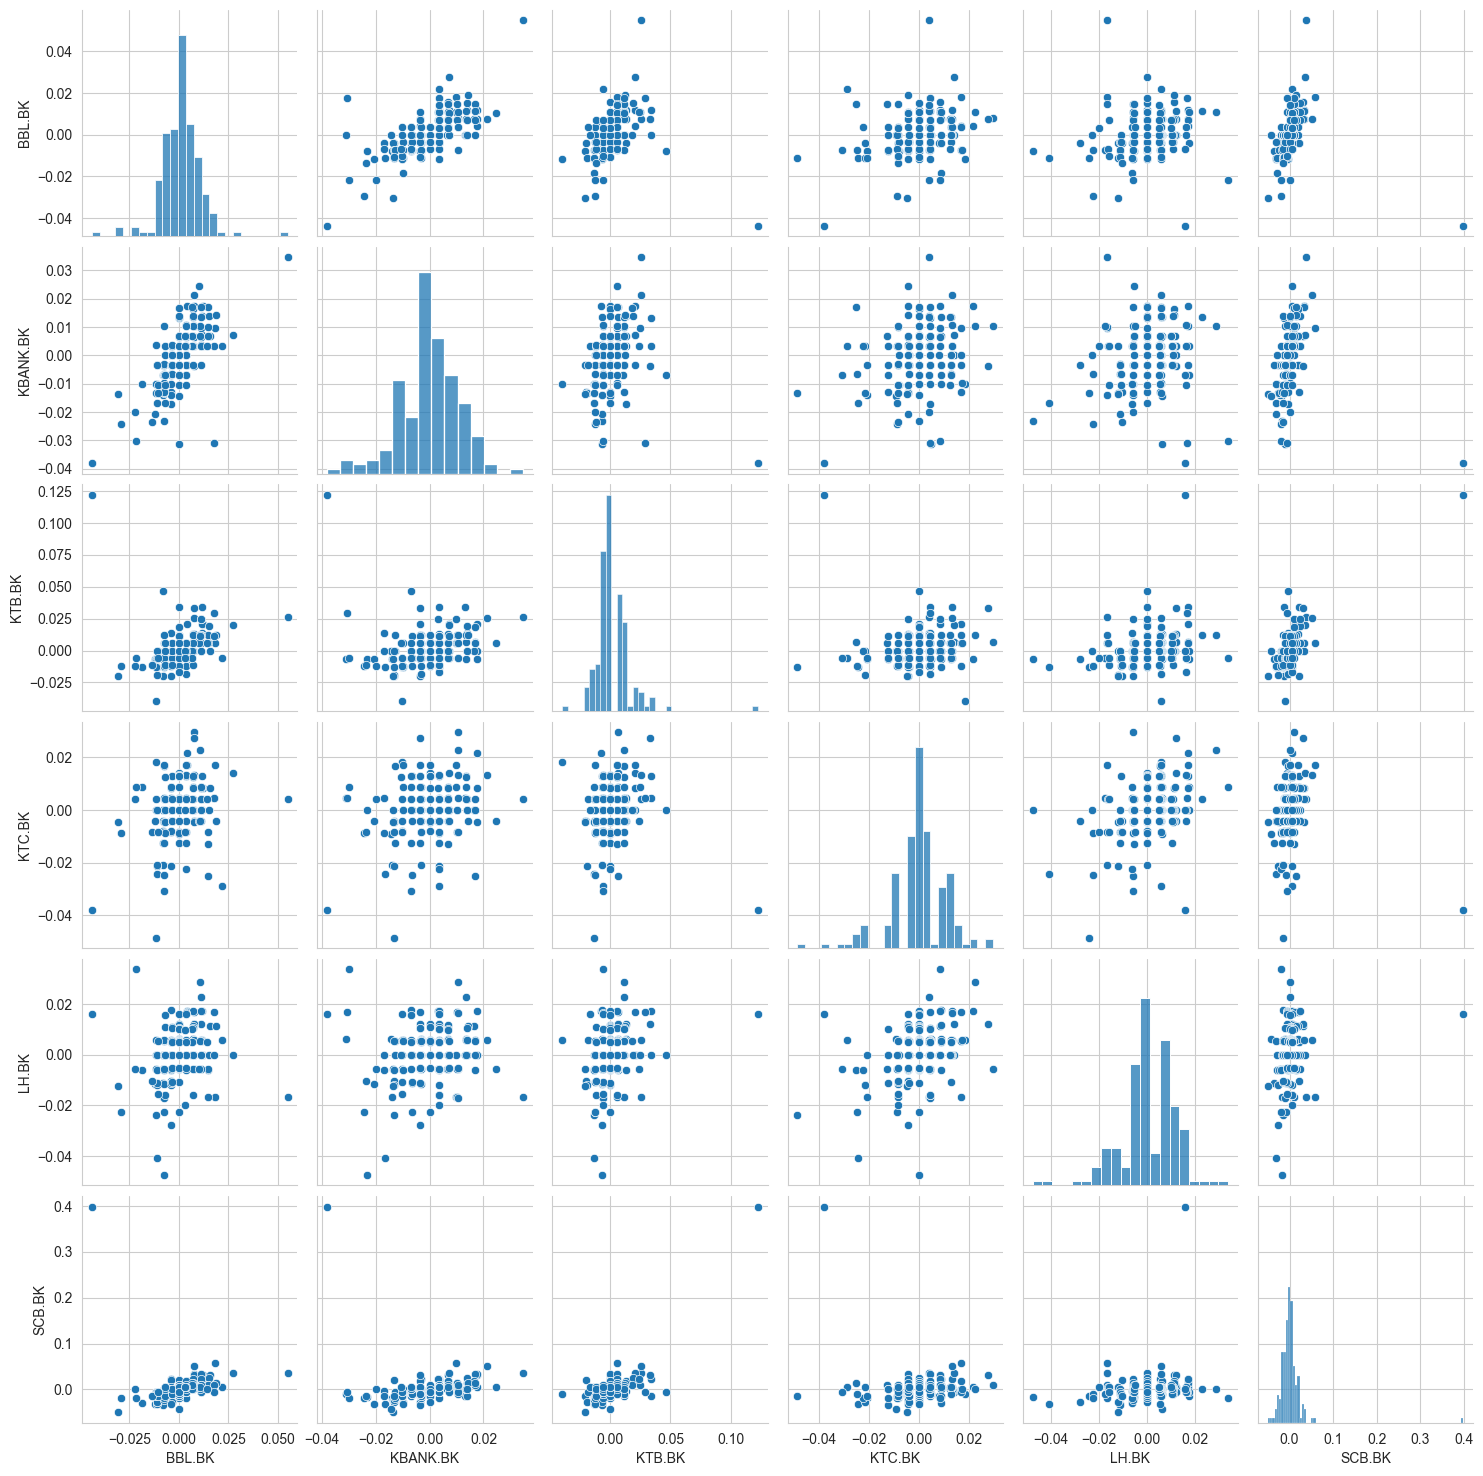

In [125]:
# plot

sns.pairplot(bank_port_rets)

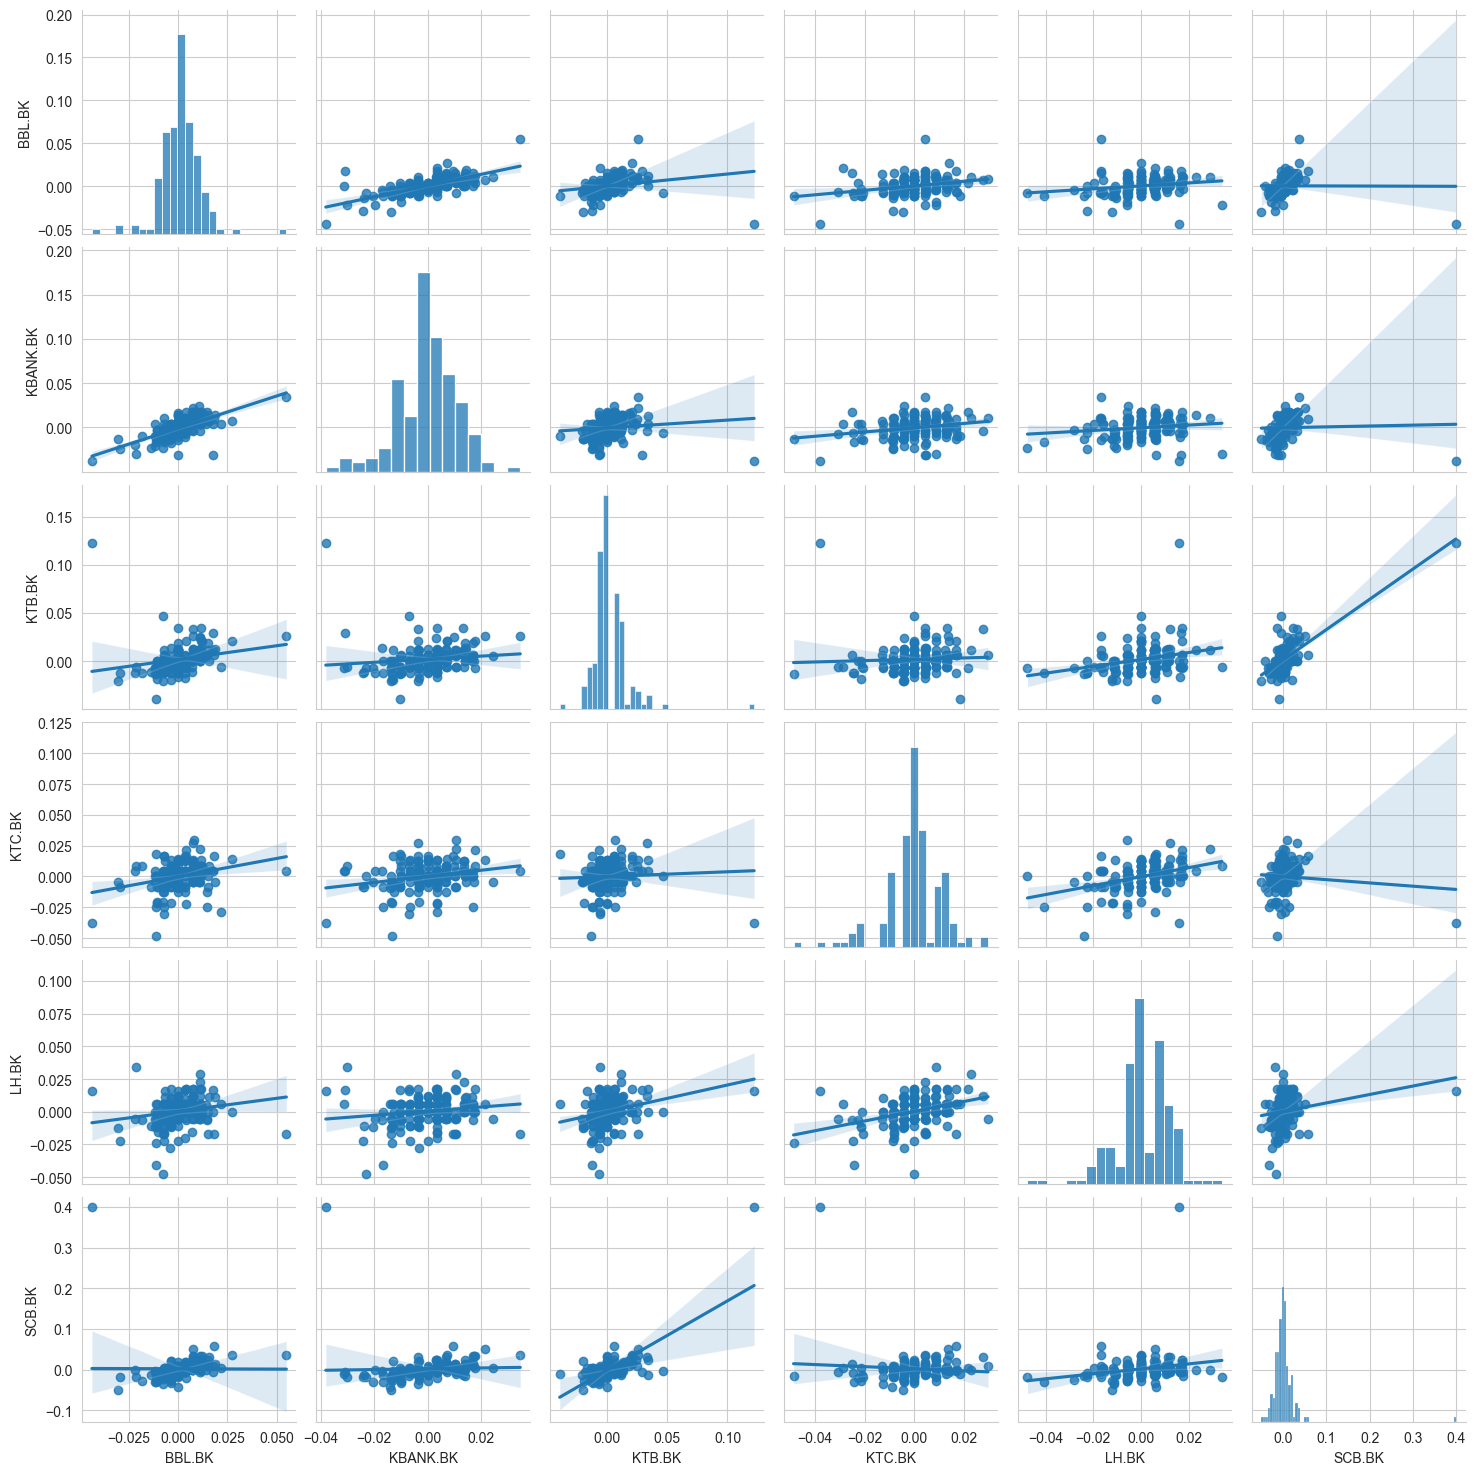

In [126]:
sns.pairplot(bank_port_rets, kind = 'reg');

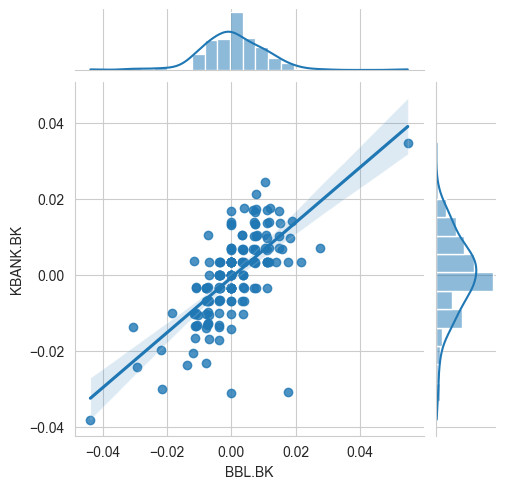

In [128]:
sns.jointplot(x = 'BBL.BK', y = 'KBANK.BK', data = bank_port_rets, kind = 'reg', height = 5);

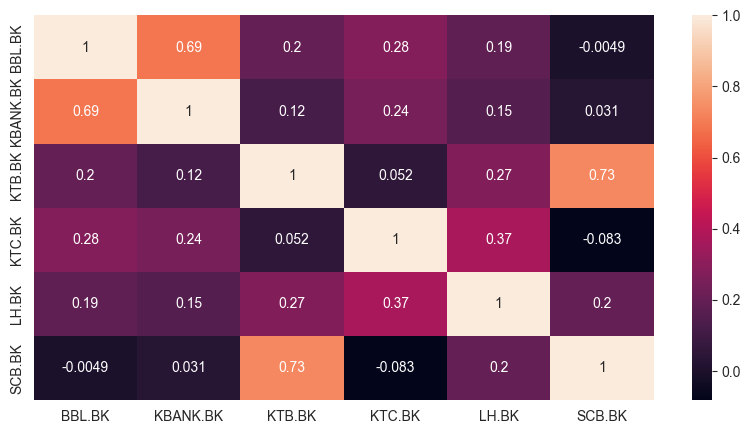

In [129]:
# heatmap

sns.heatmap(bank_port_rets.corr(), annot = True);

### Autocorrelation

In [130]:
import statsmodels.tsa.api as smt

In [131]:
ais.head()

Date
2015-01-05    249.0
2015-01-06    247.0
2015-01-07    253.0
2015-01-08    250.0
2015-01-09    248.0
Name: Close, dtype: float64

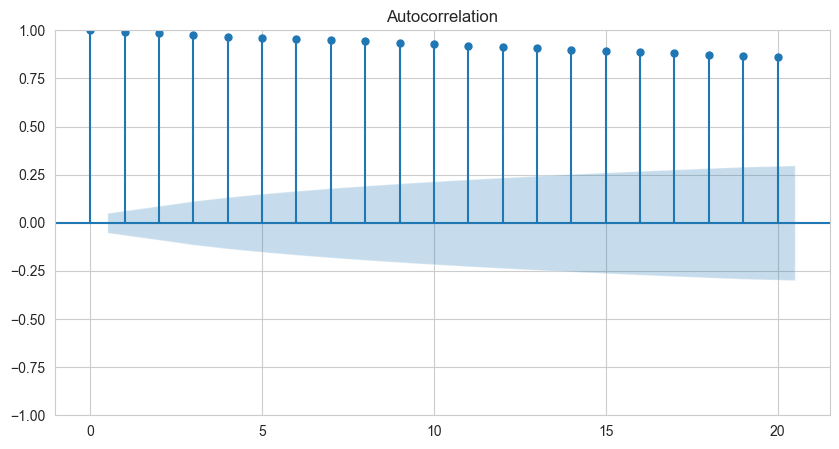

In [132]:
n_lag = 20

smt.graphics.plot_acf(ais, lags = n_lag);

In [136]:
ais.index

DatetimeIndex(['2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14',
               '2015-01-15', '2015-01-16',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-25', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', name='Date', length=1462, freq=None)

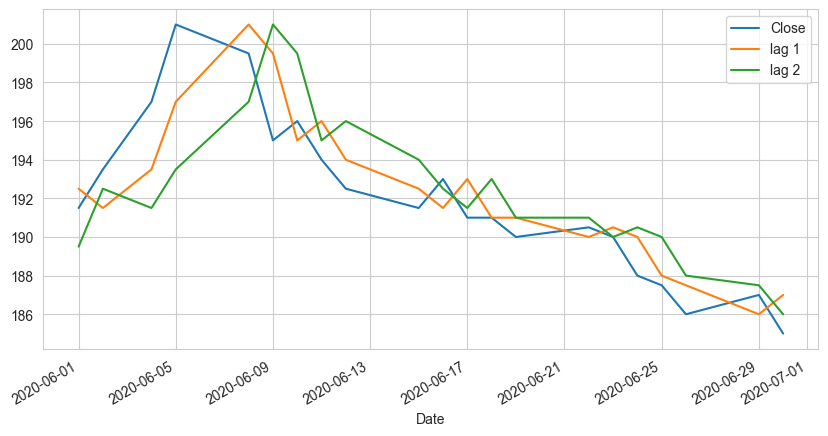

In [137]:
ais["2020-06"].plot(label = "Close")

ais.shift(1)["2020-06"].plot(label = "lag 1")
ais.shift(2)["2020-06"].plot(label = "lag 2")

plt.legend()
plt.show()

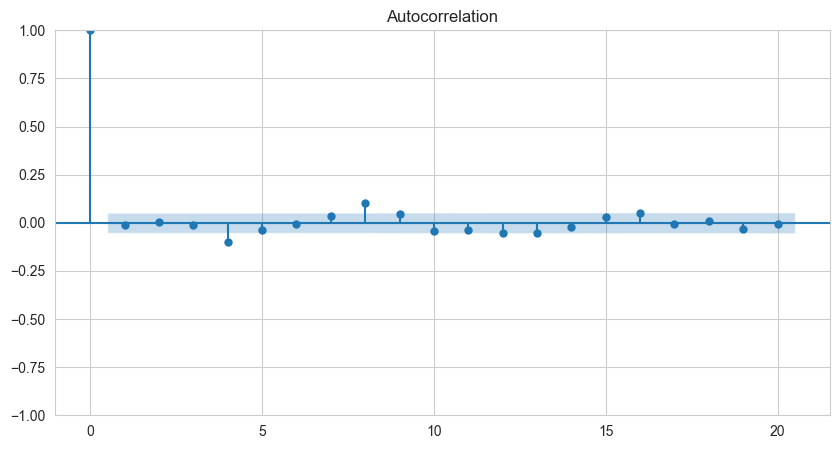

In [139]:
smt.graphics.plot_acf(ais_pct, lags = n_lag)
plt.show()

### Violin and QQ Plot (normal or not?)

In [140]:
# random small number

np.random.seed(10)

mu, sigma = 0, 0.3

stock_random = np.random.normal(mu, sigma, 20)
stock_random

array([ 0.39947595,  0.21458369, -0.46362009, -0.00251515,  0.18640079,
       -0.21602567,  0.07965348,  0.03256456,  0.00128743, -0.05238006,
        0.12990786,  0.36091121, -0.2895197 ,  0.30848222,  0.06858904,
        0.13354128, -0.34098066,  0.04054106,  0.4453611 , -0.32394147])

In [141]:
len(stock_random)

20

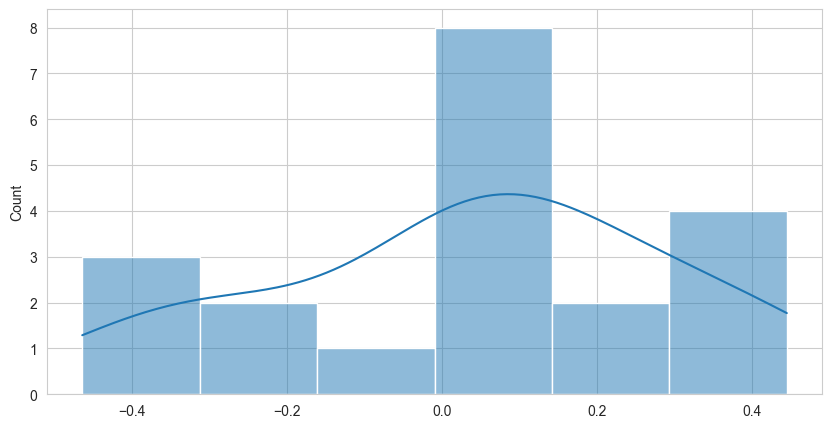

In [142]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)

sns.histplot(stock_random, kde = True);

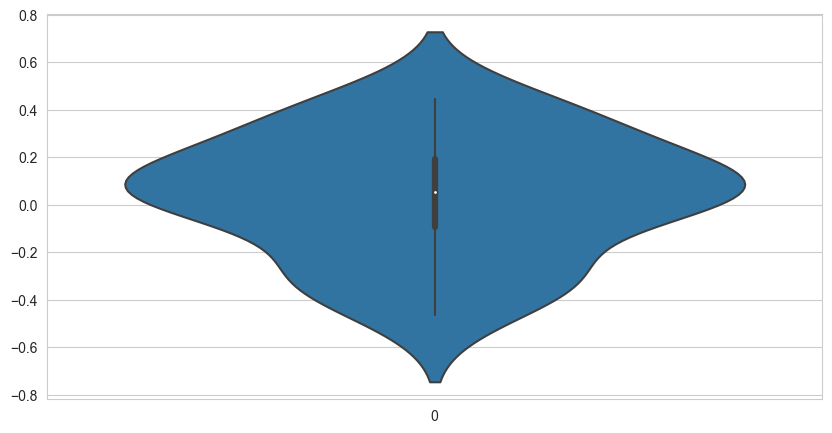

In [143]:
sns.violinplot(data = stock_random);

In [144]:
# apply scipy

from scipy import stats

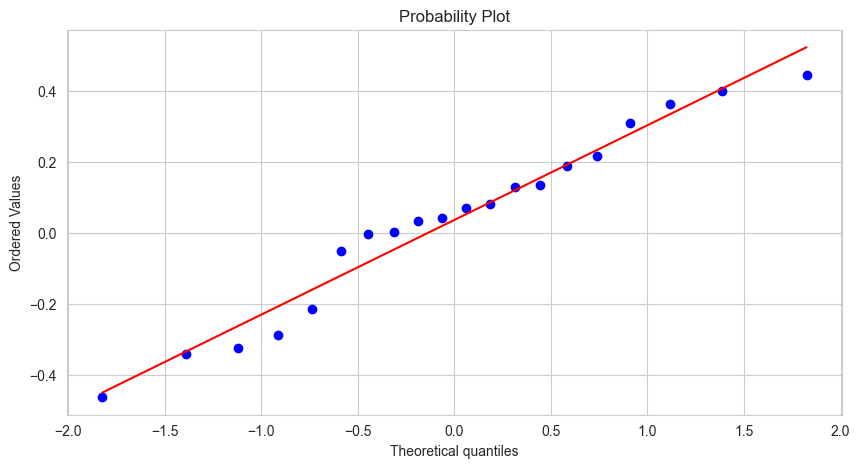

In [145]:
stats.probplot(stock_random, dist = 'norm', plot = plt);

In [146]:
# random larg number

np.random.seed(10)
mu, sigma = 0, 0.2

stock_random2 = np.random.normal(mu, sigma, 10000)
stock_random2

array([ 0.2663173 ,  0.14305579, -0.30908006, ...,  0.12947556,
        0.25014784,  0.23258884])

In [147]:
len(stock_random2)

10000

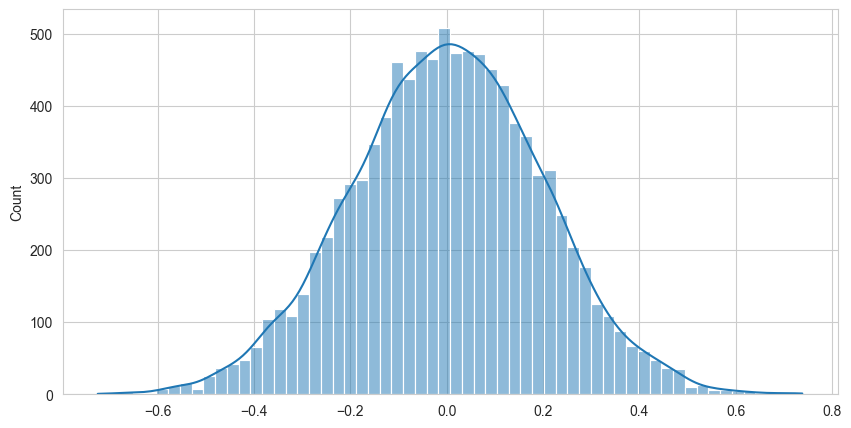

In [148]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)

sns.histplot(stock_random2, kde = True);

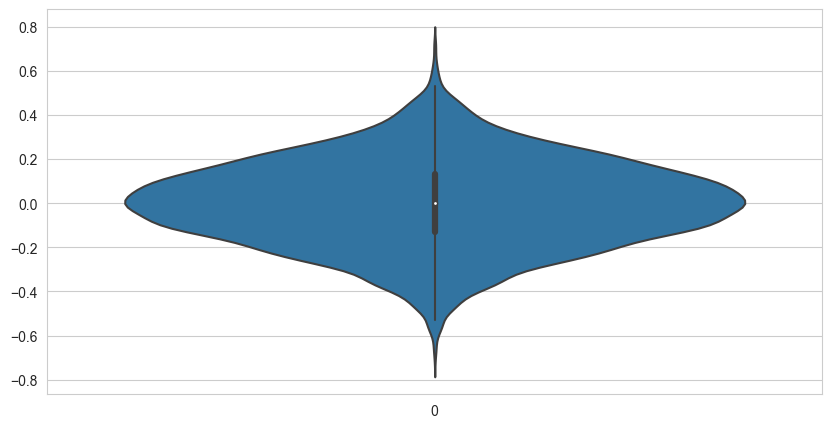

In [149]:
sns.violinplot(data = stock_random2);

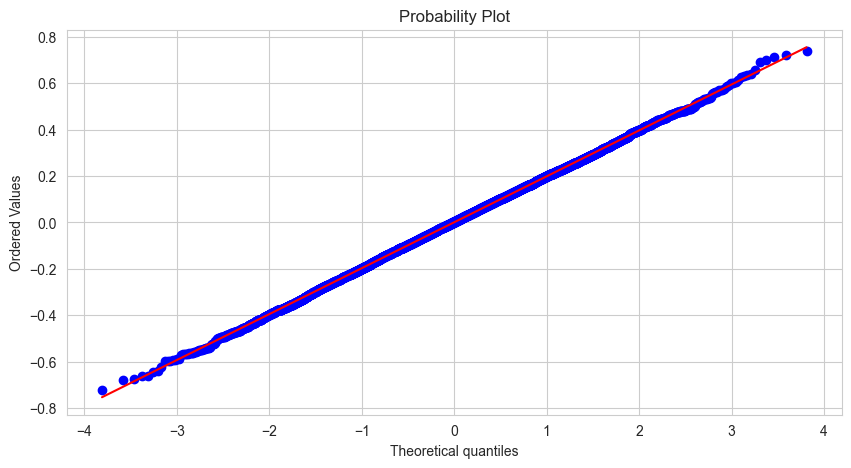

In [150]:
stats.probplot(stock_random2, dist = 'norm', plot = plt);

In [151]:
# apply to stock

ais_pct

Date
2015-01-06   -0.008032
2015-01-07    0.024291
2015-01-08   -0.011858
2015-01-09   -0.008000
2015-01-12   -0.004032
                ...   
2020-12-24    0.005634
2020-12-25    0.002801
2020-12-28   -0.011173
2020-12-29    0.008475
2020-12-30   -0.014006
Name: Close, Length: 1461, dtype: float64

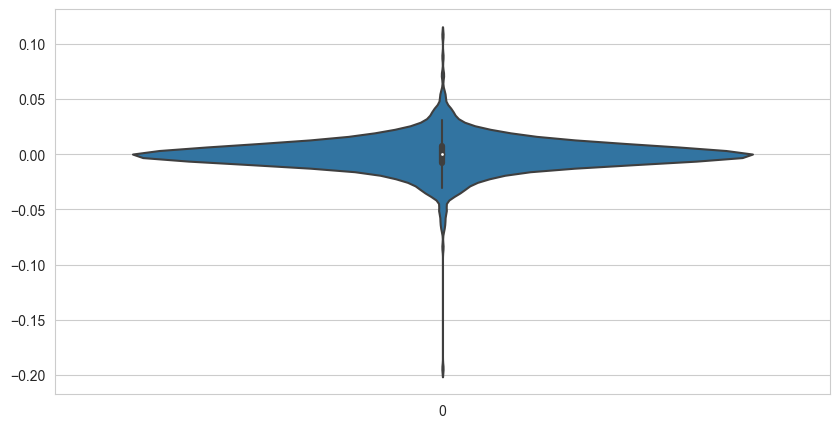

In [152]:
sns.violinplot(data = ais_pct);

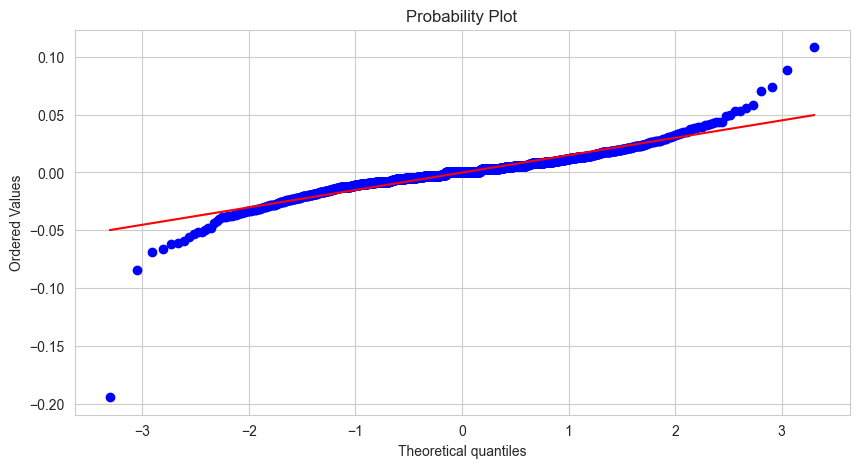

In [153]:
stats.probplot(ais_pct, dist = 'norm', plot = plt);

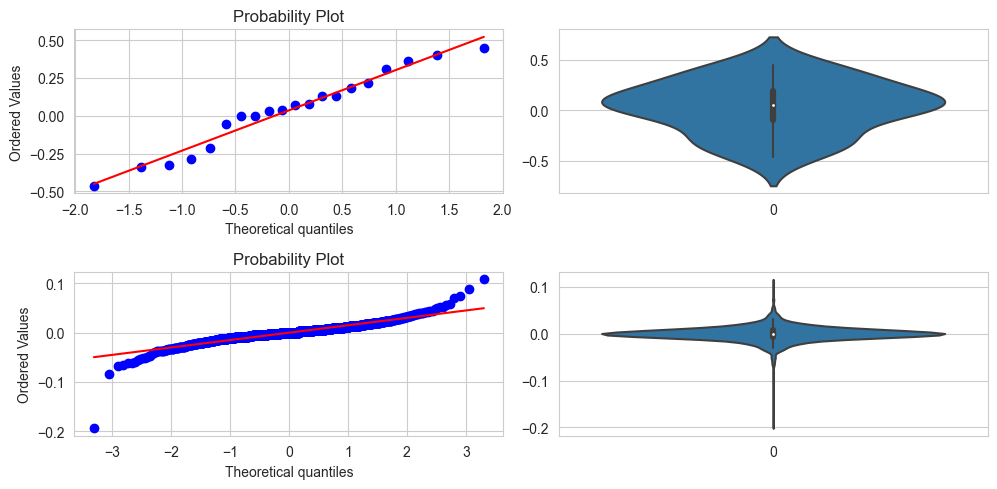

In [154]:
# plot

plt.subplot2grid((2, 2), (0, 0))
stats.probplot(stock_random, dist = "norm", plot = plt)

plt.subplot2grid((2, 2), (0, 1))
sns.violinplot(data = stock_random)

plt.subplot2grid((2, 2), (1, 0))
stats.probplot(ais_pct, dist = "norm", plot = plt)

plt.subplot2grid((2, 2), (1, 1))
sns.violinplot(data= ais_pct)

plt.tight_layout()
plt.show()